# Using Neural Network Models to Predict Metabolite Concentrations using NIR Sprectral Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/data.csv')
target = pd.read_csv('data/target.csv')

# do feature scaling here

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(data)

# Neural network

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [6]:
def create_model(input_shape):
    model = Sequential()
    model.add(Dense(64, input_shape=(input_shape,)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    return model

## Only for target column Acetate

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, target['Acetate (g/L)'], test_size=0.2, random_state=0)

In [8]:
model = create_model(X_train.shape[1])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                179264    
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                       

Epoch 1/100
5/5 [==============================] - 1s 31ms/step - loss: 1.1864 - val_loss: 3.4386
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 0.6895 - val_loss: 2.9702
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 0.7635 - val_loss: 1.7764
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 0.4926 - val_loss: 1.5946
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: 0.5732 - val_loss: 1.4546
Epoch 6/100
5/5 [==============================] - 0s 6ms/step - loss: 0.4904 - val_loss: 1.3622
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 0.5433 - val_loss: 1.3226
Epoch 8/100
5/5 [==============================] - 0s 6ms/step - loss: 0.4993 - val_loss: 1.2094
Epoch 9/100
5/5 [==============================] - 0s 6ms/step - loss: 0.5680 - val_loss: 0.9107
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 0.4813 - val_loss: 0.7586
Epoch 11/100
5/5 [==========

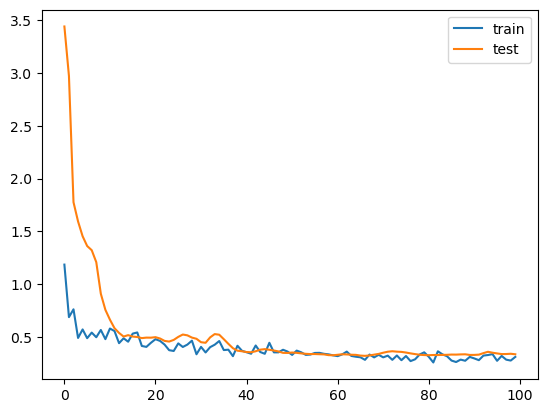

In [9]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [10]:
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))

2/2 [==============================] - 0s 2ms/step
0.3381527451474119


# Implement a neural network model with optuna for hyperparameter tuning (only Acetate)

In [11]:
import optuna

def objective(trial):
    model = Sequential()
    model.add(Dense(trial.suggest_int('units1', 32, 256), input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(trial.suggest_float('dropout1', 0.1, 0.5)))
    model.add(Dense(trial.suggest_int('units2', 32, 256)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(trial.suggest_float('dropout2', 0.1, 0.5)))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=0)

    return mean_squared_error(y_test, model.predict(X_test))

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

trial = study.best_trial
print('MSE: ', trial.value)
print('Best hyperparameters: ', trial.params)

/Users/nisha/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-02-09 19:31:44,621] A new study created in memory with name: no-name-977fd9e3-b6d8-4c24-81ae-a14facc9d0eb


2/2 [==============================] - 0s 1ms/step


[I 2025-02-09 19:31:48,308] Trial 0 finished with value: 0.33959246739170607 and parameters: {'units1': 226, 'dropout1': 0.2463191031440023, 'units2': 126, 'dropout2': 0.23079101937162494}. Best is trial 0 with value: 0.33959246739170607.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:31:52,027] Trial 1 finished with value: 0.34686729212449524 and parameters: {'units1': 191, 'dropout1': 0.4791954355599406, 'units2': 166, 'dropout2': 0.4615948224220403}. Best is trial 0 with value: 0.33959246739170607.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:31:55,651] Trial 2 finished with value: 0.353134143112577 and parameters: {'units1': 196, 'dropout1': 0.4529480595720437, 'units2': 214, 'dropout2': 0.4314567442403197}. Best is trial 0 with value: 0.33959246739170607.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:31:59,418] Trial 3 finished with value: 0.34112482559405727 and parameters: {'units1': 193, 'dropout1': 0.1980721401049772, 'units2': 186, 'dropout2': 0.47563538922518306}. Best is trial 0 with value: 0.33959246739170607.


2/2 [==============================] - 0s 1ms/step


[I 2025-02-09 19:32:02,690] Trial 4 finished with value: 0.32778855398810597 and parameters: {'units1': 114, 'dropout1': 0.2108627768604655, 'units2': 160, 'dropout2': 0.3368450160227489}. Best is trial 4 with value: 0.32778855398810597.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:32:05,869] Trial 5 finished with value: 0.3353607740111744 and parameters: {'units1': 52, 'dropout1': 0.41472673800051313, 'units2': 174, 'dropout2': 0.4421120406999916}. Best is trial 4 with value: 0.32778855398810597.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:32:10,432] Trial 6 finished with value: 0.36209172490762664 and parameters: {'units1': 234, 'dropout1': 0.10958596112192459, 'units2': 95, 'dropout2': 0.42154223179364325}. Best is trial 4 with value: 0.32778855398810597.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:32:13,815] Trial 7 finished with value: 0.32915693426198156 and parameters: {'units1': 133, 'dropout1': 0.20318978135740756, 'units2': 256, 'dropout2': 0.4701273088806816}. Best is trial 4 with value: 0.32778855398810597.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:32:17,477] Trial 8 finished with value: 0.34025188644249693 and parameters: {'units1': 158, 'dropout1': 0.36303020364698413, 'units2': 94, 'dropout2': 0.3780380415760075}. Best is trial 4 with value: 0.32778855398810597.


2/2 [==============================] - 0s 1ms/step


[I 2025-02-09 19:32:20,468] Trial 9 finished with value: 0.3430342850301773 and parameters: {'units1': 116, 'dropout1': 0.14169975361820014, 'units2': 47, 'dropout2': 0.4336679644640419}. Best is trial 4 with value: 0.32778855398810597.


2/2 [==============================] - 0s 1ms/step


[I 2025-02-09 19:32:23,605] Trial 10 finished with value: 0.3471104654375367 and parameters: {'units1': 77, 'dropout1': 0.3118214755168585, 'units2': 225, 'dropout2': 0.16591634291460763}. Best is trial 4 with value: 0.32778855398810597.


2/2 [==============================] - 0s 1ms/step


[I 2025-02-09 19:32:26,903] Trial 11 finished with value: 0.3371841534308668 and parameters: {'units1': 118, 'dropout1': 0.2110009081076091, 'units2': 250, 'dropout2': 0.30955912784785833}. Best is trial 4 with value: 0.32778855398810597.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:32:30,122] Trial 12 finished with value: 0.3373970024806098 and parameters: {'units1': 108, 'dropout1': 0.268198842304193, 'units2': 254, 'dropout2': 0.33392758527068134}. Best is trial 4 with value: 0.32778855398810597.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:32:33,764] Trial 13 finished with value: 0.34040629578850956 and parameters: {'units1': 162, 'dropout1': 0.18431681633173164, 'units2': 137, 'dropout2': 0.22903720797936894}. Best is trial 4 with value: 0.32778855398810597.


2/2 [==============================] - 0s 1ms/step


[I 2025-02-09 19:32:36,950] Trial 14 finished with value: 0.34881511492914374 and parameters: {'units1': 74, 'dropout1': 0.3084016466600535, 'units2': 208, 'dropout2': 0.35493914087299366}. Best is trial 4 with value: 0.32778855398810597.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:32:40,323] Trial 15 finished with value: 0.33348369950348056 and parameters: {'units1': 135, 'dropout1': 0.14615991716599103, 'units2': 42, 'dropout2': 0.2563639653322215}. Best is trial 4 with value: 0.32778855398810597.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:32:43,811] Trial 16 finished with value: 0.3373223271275589 and parameters: {'units1': 91, 'dropout1': 0.244413906942096, 'units2': 88, 'dropout2': 0.497070767431268}. Best is trial 4 with value: 0.32778855398810597.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 19:32:47,585] Trial 17 finished with value: 0.3564047898991972 and parameters: {'units1': 45, 'dropout1': 0.35375685877892704, 'units2': 152, 'dropout2': 0.13380996261599332}. Best is trial 4 with value: 0.32778855398810597.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:32:51,080] Trial 18 finished with value: 0.3513980987606006 and parameters: {'units1': 149, 'dropout1': 0.15726913434694517, 'units2': 190, 'dropout2': 0.3858570224909822}. Best is trial 4 with value: 0.32778855398810597.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:32:55,081] Trial 19 finished with value: 0.3354062527204503 and parameters: {'units1': 171, 'dropout1': 0.10113189356248917, 'units2': 233, 'dropout2': 0.27536111990841944}. Best is trial 4 with value: 0.32778855398810597.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:32:58,602] Trial 20 finished with value: 0.32963397552012386 and parameters: {'units1': 137, 'dropout1': 0.22613018468252047, 'units2': 119, 'dropout2': 0.19333760991161872}. Best is trial 4 with value: 0.32778855398810597.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:33:02,209] Trial 21 finished with value: 0.32932566753245496 and parameters: {'units1': 139, 'dropout1': 0.22398506075480035, 'units2': 118, 'dropout2': 0.19156669449873667}. Best is trial 4 with value: 0.32778855398810597.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:33:05,430] Trial 22 finished with value: 0.3407518305930862 and parameters: {'units1': 103, 'dropout1': 0.1800854270878352, 'units2': 74, 'dropout2': 0.10087003607369519}. Best is trial 4 with value: 0.32778855398810597.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:33:08,785] Trial 23 finished with value: 0.37394635131578335 and parameters: {'units1': 133, 'dropout1': 0.2788680804257693, 'units2': 109, 'dropout2': 0.29383084770476964}. Best is trial 4 with value: 0.32778855398810597.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:33:13,128] Trial 24 finished with value: 0.35156138577339335 and parameters: {'units1': 176, 'dropout1': 0.22143886943240826, 'units2': 148, 'dropout2': 0.395775518187525}. Best is trial 4 with value: 0.32778855398810597.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:33:18,381] Trial 25 finished with value: 0.33301593508654737 and parameters: {'units1': 89, 'dropout1': 0.27621772342057127, 'units2': 74, 'dropout2': 0.17852385213057817}. Best is trial 4 with value: 0.32778855398810597.


2/2 [==============================] - 0s 1ms/step


[I 2025-02-09 19:33:21,683] Trial 26 finished with value: 0.34370304578316163 and parameters: {'units1': 124, 'dropout1': 0.16430785484729377, 'units2': 198, 'dropout2': 0.32454670024507704}. Best is trial 4 with value: 0.32778855398810597.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:33:25,553] Trial 27 finished with value: 0.3274138144975612 and parameters: {'units1': 150, 'dropout1': 0.33084157829681315, 'units2': 173, 'dropout2': 0.22078912499683206}. Best is trial 27 with value: 0.3274138144975612.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:33:28,810] Trial 28 finished with value: 0.3405231358821285 and parameters: {'units1': 59, 'dropout1': 0.33958964236587624, 'units2': 161, 'dropout2': 0.24603936449413766}. Best is trial 27 with value: 0.3274138144975612.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:33:32,548] Trial 29 finished with value: 0.37158830858606834 and parameters: {'units1': 215, 'dropout1': 0.39018415955325664, 'units2': 137, 'dropout2': 0.21060331443703662}. Best is trial 27 with value: 0.3274138144975612.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:33:36,447] Trial 30 finished with value: 0.33994686099298793 and parameters: {'units1': 152, 'dropout1': 0.24725092476294558, 'units2': 177, 'dropout2': 0.2762492088605328}. Best is trial 27 with value: 0.3274138144975612.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:33:40,320] Trial 31 finished with value: 0.33288562289163914 and parameters: {'units1': 249, 'dropout1': 0.24658314384698704, 'units2': 123, 'dropout2': 0.14817977562599444}. Best is trial 27 with value: 0.3274138144975612.


2/2 [==============================] - 0s 1ms/step


[I 2025-02-09 19:33:43,719] Trial 32 finished with value: 0.3630918362195229 and parameters: {'units1': 144, 'dropout1': 0.29247803359200253, 'units2': 108, 'dropout2': 0.21472588296925957}. Best is trial 27 with value: 0.3274138144975612.


2/2 [==============================] - 0s 1ms/step


[I 2025-02-09 19:33:47,091] Trial 33 finished with value: 0.3167507444877963 and parameters: {'units1': 173, 'dropout1': 0.3199075640780261, 'units2': 162, 'dropout2': 0.1082523334558257}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 1ms/step


[I 2025-02-09 19:33:50,485] Trial 34 finished with value: 0.36517846581646884 and parameters: {'units1': 185, 'dropout1': 0.3356815480655251, 'units2': 158, 'dropout2': 0.11038553001879231}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 5ms/step


[I 2025-02-09 19:33:54,660] Trial 35 finished with value: 0.345815382186669 and parameters: {'units1': 205, 'dropout1': 0.3931658739659416, 'units2': 174, 'dropout2': 0.3565338546129458}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:33:59,548] Trial 36 finished with value: 0.3404672333099555 and parameters: {'units1': 170, 'dropout1': 0.31841637032151504, 'units2': 211, 'dropout2': 0.4102597607110199}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:34:03,055] Trial 37 finished with value: 0.32421036171117323 and parameters: {'units1': 125, 'dropout1': 0.4391655815055205, 'units2': 238, 'dropout2': 0.12965370679186694}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:34:06,441] Trial 38 finished with value: 0.3296313080083931 and parameters: {'units1': 102, 'dropout1': 0.48786259744380867, 'units2': 234, 'dropout2': 0.12837483493826238}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:34:10,061] Trial 39 finished with value: 0.32586924596091993 and parameters: {'units1': 186, 'dropout1': 0.4516371339514198, 'units2': 192, 'dropout2': 0.14969108997504627}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:34:13,838] Trial 40 finished with value: 0.39503506046854736 and parameters: {'units1': 199, 'dropout1': 0.4480607069663917, 'units2': 199, 'dropout2': 0.15449200680921146}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:34:17,499] Trial 41 finished with value: 0.40167662191188863 and parameters: {'units1': 186, 'dropout1': 0.43464112244647674, 'units2': 184, 'dropout2': 0.12390633240425986}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:34:21,272] Trial 42 finished with value: 0.3309642727137106 and parameters: {'units1': 163, 'dropout1': 0.4757434442470914, 'units2': 169, 'dropout2': 0.16331818881714902}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:34:24,942] Trial 43 finished with value: 0.346200848328963 and parameters: {'units1': 223, 'dropout1': 0.4173500691483719, 'units2': 191, 'dropout2': 0.13813740482430273}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:34:28,403] Trial 44 finished with value: 0.3330933281121835 and parameters: {'units1': 178, 'dropout1': 0.38398856164625156, 'units2': 223, 'dropout2': 0.11863576621630627}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:34:31,997] Trial 45 finished with value: 0.38622260467650665 and parameters: {'units1': 123, 'dropout1': 0.45977860305178975, 'units2': 165, 'dropout2': 0.18740669961890968}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:34:35,464] Trial 46 finished with value: 0.3434714543981216 and parameters: {'units1': 156, 'dropout1': 0.4305588065477731, 'units2': 141, 'dropout2': 0.10018870705843373}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:34:39,427] Trial 47 finished with value: 0.33989785476848466 and parameters: {'units1': 206, 'dropout1': 0.3700084430960126, 'units2': 181, 'dropout2': 0.17299611657418867}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:34:43,734] Trial 48 finished with value: 0.3439912401587301 and parameters: {'units1': 124, 'dropout1': 0.49870694056393394, 'units2': 242, 'dropout2': 0.14662269108349557}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:34:47,186] Trial 49 finished with value: 0.35002311623961546 and parameters: {'units1': 96, 'dropout1': 0.40663049754482095, 'units2': 219, 'dropout2': 0.2196885065913911}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:34:50,681] Trial 50 finished with value: 0.34579321700021315 and parameters: {'units1': 111, 'dropout1': 0.46727448443249014, 'units2': 201, 'dropout2': 0.25097113647174707}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:34:54,497] Trial 51 finished with value: 0.3406101130404017 and parameters: {'units1': 128, 'dropout1': 0.20449279458640324, 'units2': 248, 'dropout2': 0.11936888436204182}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:34:58,062] Trial 52 finished with value: 0.3630931350016803 and parameters: {'units1': 146, 'dropout1': 0.3253701037102061, 'units2': 256, 'dropout2': 0.4516857188790129}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:35:02,194] Trial 53 finished with value: 0.3380743122051528 and parameters: {'units1': 163, 'dropout1': 0.2956026763068006, 'units2': 237, 'dropout2': 0.36747223903230336}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:35:05,512] Trial 54 finished with value: 0.33603817130707464 and parameters: {'units1': 112, 'dropout1': 0.19172777227816046, 'units2': 153, 'dropout2': 0.484872150160207}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:35:09,062] Trial 55 finished with value: 0.32650183711938807 and parameters: {'units1': 140, 'dropout1': 0.3546487591046968, 'units2': 228, 'dropout2': 0.2045111389441827}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:35:12,841] Trial 56 finished with value: 0.3410597740289136 and parameters: {'units1': 141, 'dropout1': 0.34715532315976055, 'units2': 206, 'dropout2': 0.19951906296230665}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:35:16,474] Trial 57 finished with value: 0.32597071446927617 and parameters: {'units1': 156, 'dropout1': 0.36820566606873767, 'units2': 215, 'dropout2': 0.23275757217798174}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:35:19,978] Trial 58 finished with value: 0.32729165627088525 and parameters: {'units1': 169, 'dropout1': 0.36822348955479256, 'units2': 216, 'dropout2': 0.23429608521066397}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:35:23,554] Trial 59 finished with value: 0.35245345076375795 and parameters: {'units1': 190, 'dropout1': 0.3627400784277529, 'units2': 228, 'dropout2': 0.23562181596841494}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:35:27,578] Trial 60 finished with value: 0.33046190358545235 and parameters: {'units1': 170, 'dropout1': 0.3737134562972731, 'units2': 214, 'dropout2': 0.27376280035067097}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:35:31,277] Trial 61 finished with value: 0.3207141170616324 and parameters: {'units1': 180, 'dropout1': 0.330197991625128, 'units2': 193, 'dropout2': 0.20278449055513437}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:35:35,112] Trial 62 finished with value: 0.3315408574248657 and parameters: {'units1': 181, 'dropout1': 0.3506885319231839, 'units2': 217, 'dropout2': 0.16110336669898856}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:35:39,001] Trial 63 finished with value: 0.3279548501528262 and parameters: {'units1': 196, 'dropout1': 0.40761927819827326, 'units2': 242, 'dropout2': 0.20504709350726008}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 1ms/step


[I 2025-02-09 19:35:42,357] Trial 64 finished with value: 0.3268839975434384 and parameters: {'units1': 160, 'dropout1': 0.3124677387342362, 'units2': 228, 'dropout2': 0.2649882273016087}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:35:46,634] Trial 65 finished with value: 0.33428583686667257 and parameters: {'units1': 158, 'dropout1': 0.3046503274951685, 'units2': 192, 'dropout2': 0.18227995166738298}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:35:50,197] Trial 66 finished with value: 0.33609916703286463 and parameters: {'units1': 176, 'dropout1': 0.26463529803829555, 'units2': 228, 'dropout2': 0.26132286300649}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:35:54,190] Trial 67 finished with value: 0.32524080751933215 and parameters: {'units1': 152, 'dropout1': 0.311159844272481, 'units2': 209, 'dropout2': 0.13872094762121662}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:35:57,896] Trial 68 finished with value: 0.32555977396514885 and parameters: {'units1': 153, 'dropout1': 0.2922803184222545, 'units2': 206, 'dropout2': 0.13867913755783662}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:36:01,661] Trial 69 finished with value: 0.3242781454699476 and parameters: {'units1': 152, 'dropout1': 0.29204678232667497, 'units2': 202, 'dropout2': 0.1425438440386995}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:36:05,365] Trial 70 finished with value: 0.3425657149898506 and parameters: {'units1': 131, 'dropout1': 0.28545267325040896, 'units2': 203, 'dropout2': 0.13677141721428893}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:36:09,094] Trial 71 finished with value: 0.32381920947775183 and parameters: {'units1': 151, 'dropout1': 0.26312508389024863, 'units2': 196, 'dropout2': 0.11275201294661796}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:36:12,837] Trial 72 finished with value: 0.3398424055936243 and parameters: {'units1': 149, 'dropout1': 0.26413622044988955, 'units2': 193, 'dropout2': 0.11306511750646307}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:36:16,655] Trial 73 finished with value: 0.32614595152502224 and parameters: {'units1': 165, 'dropout1': 0.2797973521781554, 'units2': 185, 'dropout2': 0.14153409348440968}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:36:20,718] Trial 74 finished with value: 0.3557247206383737 and parameters: {'units1': 182, 'dropout1': 0.25049575904675514, 'units2': 207, 'dropout2': 0.15496871583434269}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:36:24,371] Trial 75 finished with value: 0.3598259026938594 and parameters: {'units1': 190, 'dropout1': 0.234098177524163, 'units2': 198, 'dropout2': 0.10357183310168383}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:36:28,514] Trial 76 finished with value: 0.3501679701430083 and parameters: {'units1': 153, 'dropout1': 0.2985404445891827, 'units2': 177, 'dropout2': 0.13041851948521035}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:36:32,337] Trial 77 finished with value: 0.32087538491162376 and parameters: {'units1': 175, 'dropout1': 0.32552553878518975, 'units2': 195, 'dropout2': 0.16533352721005962}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:36:36,017] Trial 78 finished with value: 0.3364157342096842 and parameters: {'units1': 174, 'dropout1': 0.3175432904825138, 'units2': 183, 'dropout2': 0.166312561106128}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 1ms/step


[I 2025-02-09 19:36:39,400] Trial 79 finished with value: 0.3374243248868345 and parameters: {'units1': 136, 'dropout1': 0.3263397044747533, 'units2': 208, 'dropout2': 0.17403214294569513}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:36:42,906] Trial 80 finished with value: 0.3459402658938797 and parameters: {'units1': 119, 'dropout1': 0.2594948028852961, 'units2': 198, 'dropout2': 0.11120776756880106}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:36:46,712] Trial 81 finished with value: 0.3389986485489255 and parameters: {'units1': 202, 'dropout1': 0.29051566454993033, 'units2': 189, 'dropout2': 0.14777010331559623}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:36:50,520] Trial 82 finished with value: 0.3503261712408013 and parameters: {'units1': 212, 'dropout1': 0.27264149314437974, 'units2': 167, 'dropout2': 0.12498679527865898}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:36:54,459] Trial 83 finished with value: 0.35195538671239746 and parameters: {'units1': 146, 'dropout1': 0.3057370481036421, 'units2': 222, 'dropout2': 0.13411740307009865}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:36:58,339] Trial 84 finished with value: 0.36323838776179124 and parameters: {'units1': 165, 'dropout1': 0.442456158590268, 'units2': 196, 'dropout2': 0.1558172403431472}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:37:02,128] Trial 85 finished with value: 0.31858874664506026 and parameters: {'units1': 193, 'dropout1': 0.12134432591008198, 'units2': 204, 'dropout2': 0.11580813175073185}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:37:05,720] Trial 86 finished with value: 0.33910706441092503 and parameters: {'units1': 194, 'dropout1': 0.33762841497964124, 'units2': 211, 'dropout2': 0.11689013918373416}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:37:09,358] Trial 87 finished with value: 0.3276920510987457 and parameters: {'units1': 154, 'dropout1': 0.15092556411199884, 'units2': 131, 'dropout2': 0.129047217613343}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 19:37:13,053] Trial 88 finished with value: 0.3199370696291463 and parameters: {'units1': 173, 'dropout1': 0.1325985121952577, 'units2': 176, 'dropout2': 0.1078794667659739}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:37:16,872] Trial 89 finished with value: 0.3624107623270417 and parameters: {'units1': 177, 'dropout1': 0.11907454525021169, 'units2': 179, 'dropout2': 0.10853365982985848}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:37:20,413] Trial 90 finished with value: 0.34434830604878414 and parameters: {'units1': 169, 'dropout1': 0.1292543862438104, 'units2': 160, 'dropout2': 0.10158024573702874}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:37:23,906] Trial 91 finished with value: 0.32766954528148273 and parameters: {'units1': 183, 'dropout1': 0.1326666104913712, 'units2': 204, 'dropout2': 0.14123077449599591}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 9ms/step


[I 2025-02-09 19:37:30,520] Trial 92 finished with value: 0.36107287008350986 and parameters: {'units1': 160, 'dropout1': 0.32302575508237225, 'units2': 171, 'dropout2': 0.12064986962162176}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:37:35,193] Trial 93 finished with value: 0.3471194020975736 and parameters: {'units1': 145, 'dropout1': 0.10757704385852618, 'units2': 211, 'dropout2': 0.1275675370840756}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:37:39,385] Trial 94 finished with value: 0.3295619087380838 and parameters: {'units1': 187, 'dropout1': 0.2838828874341403, 'units2': 186, 'dropout2': 0.16842485762835857}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 1ms/step


[I 2025-02-09 19:37:43,083] Trial 95 finished with value: 0.3554866644419199 and parameters: {'units1': 167, 'dropout1': 0.34157516065991256, 'units2': 154, 'dropout2': 0.1426211083670999}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 5ms/step


[I 2025-02-09 19:37:47,534] Trial 96 finished with value: 0.3340229650721836 and parameters: {'units1': 133, 'dropout1': 0.16608254244190418, 'units2': 146, 'dropout2': 0.11882150702885706}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:37:51,419] Trial 97 finished with value: 0.34231461385881257 and parameters: {'units1': 140, 'dropout1': 0.3110656236838688, 'units2': 163, 'dropout2': 0.15761633618196036}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 34ms/step


[I 2025-02-09 19:37:55,516] Trial 98 finished with value: 0.3506791916348147 and parameters: {'units1': 173, 'dropout1': 0.1751108730258832, 'units2': 176, 'dropout2': 0.1859722494649448}. Best is trial 33 with value: 0.3167507444877963.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:38:01,708] Trial 99 finished with value: 0.331533226274831 and parameters: {'units1': 149, 'dropout1': 0.11989357293519722, 'units2': 187, 'dropout2': 0.10791782396399699}. Best is trial 33 with value: 0.3167507444877963.


MSE:  0.3167507444877963
Best hyperparameters:  {'units1': 173, 'dropout1': 0.3199075640780261, 'units2': 162, 'dropout2': 0.1082523334558257}


# Loop through each column in target and find the best model using the best hyperparameters found by optuna (now for all metabolites)

In [12]:
best_params = []

for column in target.columns:
    X_train, X_test, y_train, y_test = train_test_split(data, target[column], test_size=0.2, random_state=0)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

    def objective(trial):
        model = Sequential()
        model.add(Dense(trial.suggest_int('units1', 32, 256), input_shape=(X_train.shape[1],)))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(Dropout(trial.suggest_float('dropout1', 0.1, 0.5)))
        model.add(Dense(trial.suggest_int('units2', 32, 256)))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(Dropout(trial.suggest_float('dropout2', 0.1, 0.5)))
        model.add(Dense(1))

        model.compile(optimizer='adam', loss='mean_squared_error')

        history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=0)

        return mean_squared_error(y_test, model.predict(X_test))

    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=100)

    trial = study.best_trial
    print(f'\n\n{column}:\n')
    print('MSE: ', trial.value)

    best_params.append(trial.params)

[I 2025-02-09 19:38:01,775] A new study created in memory with name: no-name-b2d8adab-4c36-4db7-b268-41e5febf3e88


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:38:05,696] Trial 0 finished with value: 127.4643032033032 and parameters: {'units1': 219, 'dropout1': 0.2075078968363213, 'units2': 97, 'dropout2': 0.3458901296572304}. Best is trial 0 with value: 127.4643032033032.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:38:08,914] Trial 1 finished with value: 130.37020649015943 and parameters: {'units1': 94, 'dropout1': 0.25144792144726685, 'units2': 96, 'dropout2': 0.49147047360698093}. Best is trial 0 with value: 127.4643032033032.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:38:12,644] Trial 2 finished with value: 161.89205220183916 and parameters: {'units1': 71, 'dropout1': 0.20260335280724534, 'units2': 117, 'dropout2': 0.4572817991177717}. Best is trial 0 with value: 127.4643032033032.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:38:16,693] Trial 3 finished with value: 266.0335407400253 and parameters: {'units1': 201, 'dropout1': 0.4811267074309671, 'units2': 40, 'dropout2': 0.49470762901185183}. Best is trial 0 with value: 127.4643032033032.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:38:19,844] Trial 4 finished with value: 173.57250928287294 and parameters: {'units1': 152, 'dropout1': 0.40685912827167786, 'units2': 60, 'dropout2': 0.3638139341051567}. Best is trial 0 with value: 127.4643032033032.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:38:23,724] Trial 5 finished with value: 135.20988247041154 and parameters: {'units1': 249, 'dropout1': 0.3284724926478093, 'units2': 141, 'dropout2': 0.1687512122882708}. Best is trial 0 with value: 127.4643032033032.


2/2 [==============================] - 0s 1ms/step


[I 2025-02-09 19:38:26,914] Trial 6 finished with value: 102.989551087269 and parameters: {'units1': 145, 'dropout1': 0.3221497440540987, 'units2': 252, 'dropout2': 0.29631169786031125}. Best is trial 6 with value: 102.989551087269.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:38:30,095] Trial 7 finished with value: 69.65145299635438 and parameters: {'units1': 151, 'dropout1': 0.10757818808789704, 'units2': 179, 'dropout2': 0.14498300397100775}. Best is trial 7 with value: 69.65145299635438.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:38:33,302] Trial 8 finished with value: 156.7254441314118 and parameters: {'units1': 228, 'dropout1': 0.4369745679779509, 'units2': 73, 'dropout2': 0.4727817872136399}. Best is trial 7 with value: 69.65145299635438.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 19:38:36,444] Trial 9 finished with value: 123.49814226948126 and parameters: {'units1': 127, 'dropout1': 0.22009549040570897, 'units2': 80, 'dropout2': 0.15488763068548766}. Best is trial 7 with value: 69.65145299635438.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:38:40,622] Trial 10 finished with value: 54.281848923009896 and parameters: {'units1': 179, 'dropout1': 0.10481611563292967, 'units2': 206, 'dropout2': 0.11359342325368954}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:38:44,398] Trial 11 finished with value: 99.7746884581974 and parameters: {'units1': 179, 'dropout1': 0.10760950942007347, 'units2': 208, 'dropout2': 0.10380659343656616}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:38:48,084] Trial 12 finished with value: 82.14901154749806 and parameters: {'units1': 177, 'dropout1': 0.11503039874366726, 'units2': 190, 'dropout2': 0.22085455486644773}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:38:51,296] Trial 13 finished with value: 111.62066217294884 and parameters: {'units1': 115, 'dropout1': 0.14880638015781547, 'units2': 184, 'dropout2': 0.11115542881220769}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 1ms/step


[I 2025-02-09 19:38:54,280] Trial 14 finished with value: 95.48107765010249 and parameters: {'units1': 33, 'dropout1': 0.1634532150283808, 'units2': 225, 'dropout2': 0.2176664836441722}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 16ms/step


[I 2025-02-09 19:38:59,345] Trial 15 finished with value: 93.45950372219178 and parameters: {'units1': 172, 'dropout1': 0.2609489272650668, 'units2': 161, 'dropout2': 0.2370777191577877}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:39:02,870] Trial 16 finished with value: 76.67070103550249 and parameters: {'units1': 197, 'dropout1': 0.1605722022044518, 'units2': 160, 'dropout2': 0.16592022608544646}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:39:05,961] Trial 17 finished with value: 101.5631921461983 and parameters: {'units1': 109, 'dropout1': 0.3726080207776689, 'units2': 245, 'dropout2': 0.26167881826265904}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 6ms/step


[I 2025-02-09 19:39:10,015] Trial 18 finished with value: 73.1326288065122 and parameters: {'units1': 154, 'dropout1': 0.10670270135621565, 'units2': 215, 'dropout2': 0.14284921332725317}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:39:13,529] Trial 19 finished with value: 104.88684945074402 and parameters: {'units1': 66, 'dropout1': 0.28960605544498, 'units2': 180, 'dropout2': 0.19118216983512332}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:39:16,878] Trial 20 finished with value: 117.5996738906615 and parameters: {'units1': 132, 'dropout1': 0.14940744735537165, 'units2': 134, 'dropout2': 0.41053359746362295}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:39:20,187] Trial 21 finished with value: 66.23628582474825 and parameters: {'units1': 164, 'dropout1': 0.114409462265764, 'units2': 209, 'dropout2': 0.1349045650299075}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:39:24,781] Trial 22 finished with value: 151.76924119022794 and parameters: {'units1': 164, 'dropout1': 0.18613337552887188, 'units2': 231, 'dropout2': 0.12125149639566365}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:39:28,306] Trial 23 finished with value: 96.07739368280545 and parameters: {'units1': 197, 'dropout1': 0.12489243858465535, 'units2': 203, 'dropout2': 0.1832384104174931}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:39:31,732] Trial 24 finished with value: 64.18749305668712 and parameters: {'units1': 187, 'dropout1': 0.1016472610017501, 'units2': 165, 'dropout2': 0.13435180991979398}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 1ms/step


[I 2025-02-09 19:39:35,096] Trial 25 finished with value: 81.25034348215303 and parameters: {'units1': 220, 'dropout1': 0.17620115917537968, 'units2': 170, 'dropout2': 0.1002162110612276}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 1ms/step


[I 2025-02-09 19:39:38,383] Trial 26 finished with value: 90.6181705469352 and parameters: {'units1': 187, 'dropout1': 0.13794711825284336, 'units2': 199, 'dropout2': 0.20268536939061563}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:39:41,781] Trial 27 finished with value: 125.83328156706544 and parameters: {'units1': 242, 'dropout1': 0.2318735936174986, 'units2': 231, 'dropout2': 0.2597937991386981}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:39:45,281] Trial 28 finished with value: 89.63904694203882 and parameters: {'units1': 206, 'dropout1': 0.1852979287587963, 'units2': 156, 'dropout2': 0.1319799043654806}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:39:48,999] Trial 29 finished with value: 92.16966970407387 and parameters: {'units1': 234, 'dropout1': 0.13721697456524726, 'units2': 130, 'dropout2': 0.32539101752160926}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:39:52,574] Trial 30 finished with value: 121.28089752560977 and parameters: {'units1': 212, 'dropout1': 0.2118677304482987, 'units2': 114, 'dropout2': 0.2809740337739212}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:39:56,146] Trial 31 finished with value: 90.82375477218493 and parameters: {'units1': 167, 'dropout1': 0.10168474563534916, 'units2': 177, 'dropout2': 0.13474376245156586}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:39:59,804] Trial 32 finished with value: 107.80193158837376 and parameters: {'units1': 129, 'dropout1': 0.10070795933670308, 'units2': 194, 'dropout2': 0.1383802609622466}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:40:03,901] Trial 33 finished with value: 93.12964397492753 and parameters: {'units1': 187, 'dropout1': 0.13610467920296185, 'units2': 220, 'dropout2': 0.16443784930631244}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:40:08,654] Trial 34 finished with value: 59.87249672147096 and parameters: {'units1': 158, 'dropout1': 0.12762033470618747, 'units2': 168, 'dropout2': 0.1797539621373475}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:40:12,028] Trial 35 finished with value: 100.08458105714904 and parameters: {'units1': 165, 'dropout1': 0.19469749146491752, 'units2': 153, 'dropout2': 0.18732928705586277}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:40:15,625] Trial 36 finished with value: 127.26499050030266 and parameters: {'units1': 137, 'dropout1': 0.25073886743263085, 'units2': 118, 'dropout2': 0.120799239273999}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:40:19,020] Trial 37 finished with value: 82.76211494179313 and parameters: {'units1': 189, 'dropout1': 0.161679547728789, 'units2': 146, 'dropout2': 0.21652256362574474}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:40:22,623] Trial 38 finished with value: 78.14558197030726 and parameters: {'units1': 157, 'dropout1': 0.132706247312599, 'units2': 170, 'dropout2': 0.35622128789782564}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 1ms/step


[I 2025-02-09 19:40:25,772] Trial 39 finished with value: 136.94940313776047 and parameters: {'units1': 93, 'dropout1': 0.16680906370517834, 'units2': 210, 'dropout2': 0.16920608552906574}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:40:29,156] Trial 40 finished with value: 72.39756601620543 and parameters: {'units1': 147, 'dropout1': 0.1255354439529606, 'units2': 239, 'dropout2': 0.3886527876962139}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:40:32,434] Trial 41 finished with value: 136.5912472699135 and parameters: {'units1': 145, 'dropout1': 0.4832582424254952, 'units2': 190, 'dropout2': 0.14428837604860098}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:40:35,763] Trial 42 finished with value: 199.4492372506718 and parameters: {'units1': 158, 'dropout1': 0.11618649399298986, 'units2': 34, 'dropout2': 0.15161958512309132}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:40:39,205] Trial 43 finished with value: 69.5720765097247 and parameters: {'units1': 175, 'dropout1': 0.10005653260167859, 'units2': 169, 'dropout2': 0.10001785700722145}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:40:42,524] Trial 44 finished with value: 118.29011314845751 and parameters: {'units1': 178, 'dropout1': 0.1466955021868147, 'units2': 148, 'dropout2': 0.11411037815808911}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:40:46,661] Trial 45 finished with value: 77.27386345932098 and parameters: {'units1': 217, 'dropout1': 0.1240284290998246, 'units2': 167, 'dropout2': 0.10254886459490711}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:40:50,242] Trial 46 finished with value: 114.302596266434 and parameters: {'units1': 182, 'dropout1': 0.38043234184257546, 'units2': 201, 'dropout2': 0.12769297579097336}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:40:53,432] Trial 47 finished with value: 60.219437557413364 and parameters: {'units1': 117, 'dropout1': 0.10305468943415802, 'units2': 136, 'dropout2': 0.17791259678696475}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:40:57,245] Trial 48 finished with value: 82.22455466077902 and parameters: {'units1': 113, 'dropout1': 0.1532721133173359, 'units2': 98, 'dropout2': 0.23614348621366532}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:41:01,891] Trial 49 finished with value: 84.27774955550858 and parameters: {'units1': 120, 'dropout1': 0.12266087904205727, 'units2': 137, 'dropout2': 0.1743060940319688}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 19:41:06,815] Trial 50 finished with value: 133.38079215057937 and parameters: {'units1': 103, 'dropout1': 0.33009761876484545, 'units2': 120, 'dropout2': 0.20370907559866508}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:41:11,086] Trial 51 finished with value: 114.79101481382025 and parameters: {'units1': 171, 'dropout1': 0.10692382347635719, 'units2': 179, 'dropout2': 0.1594589821878337}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:41:15,555] Trial 52 finished with value: 140.78634159840647 and parameters: {'units1': 140, 'dropout1': 0.460651852197213, 'units2': 164, 'dropout2': 0.11868741758266187}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 5ms/step


[I 2025-02-09 19:41:20,288] Trial 53 finished with value: 90.84328399859078 and parameters: {'units1': 79, 'dropout1': 0.1178548792909491, 'units2': 127, 'dropout2': 0.1526091471413563}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 5ms/step


[I 2025-02-09 19:41:25,257] Trial 54 finished with value: 115.54840411146361 and parameters: {'units1': 194, 'dropout1': 0.10019719836701348, 'units2': 102, 'dropout2': 0.10037565424287422}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:41:29,437] Trial 55 finished with value: 85.04493064637988 and parameters: {'units1': 162, 'dropout1': 0.17634863688886135, 'units2': 253, 'dropout2': 0.17873820148242495}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:41:33,616] Trial 56 finished with value: 86.0673303654159 and parameters: {'units1': 204, 'dropout1': 0.1390782924093125, 'units2': 187, 'dropout2': 0.439680330391783}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:41:37,162] Trial 57 finished with value: 111.97674820507122 and parameters: {'units1': 174, 'dropout1': 0.11697026896799485, 'units2': 52, 'dropout2': 0.1314726645977745}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:41:40,693] Trial 58 finished with value: 67.00307101368057 and parameters: {'units1': 152, 'dropout1': 0.15050527223530136, 'units2': 144, 'dropout2': 0.11558605547264669}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:41:44,079] Trial 59 finished with value: 144.11533438856105 and parameters: {'units1': 121, 'dropout1': 0.14827032026474227, 'units2': 108, 'dropout2': 0.1578728782525929}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:41:47,466] Trial 60 finished with value: 109.8306203778805 and parameters: {'units1': 151, 'dropout1': 0.17611843785332765, 'units2': 151, 'dropout2': 0.19931128069032966}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:41:51,041] Trial 61 finished with value: 81.18288788540518 and parameters: {'units1': 177, 'dropout1': 0.11490561473917026, 'units2': 173, 'dropout2': 0.12068602940719986}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 19:41:55,018] Trial 62 finished with value: 116.1539195060364 and parameters: {'units1': 137, 'dropout1': 0.12927370878898095, 'units2': 86, 'dropout2': 0.11123725766353731}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:41:58,531] Trial 63 finished with value: 61.094923011613176 and parameters: {'units1': 151, 'dropout1': 0.10010713463027132, 'units2': 140, 'dropout2': 0.14347427129970441}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:42:01,994] Trial 64 finished with value: 57.6905554007221 and parameters: {'units1': 153, 'dropout1': 0.15783809476508606, 'units2': 139, 'dropout2': 0.136913925669515}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:42:05,419] Trial 65 finished with value: 145.30369598144273 and parameters: {'units1': 125, 'dropout1': 0.29571292370898555, 'units2': 138, 'dropout2': 0.14376896012462242}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 19:42:09,124] Trial 66 finished with value: 74.24197476596252 and parameters: {'units1': 160, 'dropout1': 0.11324836970034655, 'units2': 124, 'dropout2': 0.17000533664360848}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 19:42:14,315] Trial 67 finished with value: 122.02372650682776 and parameters: {'units1': 167, 'dropout1': 0.20281274147658052, 'units2': 214, 'dropout2': 0.18676740049077767}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:42:19,242] Trial 68 finished with value: 72.70829077099629 and parameters: {'units1': 145, 'dropout1': 0.1369311751474122, 'units2': 159, 'dropout2': 0.2345076224056209}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:42:22,399] Trial 69 finished with value: 148.37642574647262 and parameters: {'units1': 38, 'dropout1': 0.16343663592140462, 'units2': 135, 'dropout2': 0.13760453576773352}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:42:25,665] Trial 70 finished with value: 88.77326490022492 and parameters: {'units1': 135, 'dropout1': 0.12721239397662987, 'units2': 196, 'dropout2': 0.20937675883135592}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:42:28,892] Trial 71 finished with value: 65.80681364911213 and parameters: {'units1': 155, 'dropout1': 0.1495678666588191, 'units2': 144, 'dropout2': 0.1520658068810815}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:42:32,464] Trial 72 finished with value: 81.10865704489777 and parameters: {'units1': 187, 'dropout1': 0.14187583807818246, 'units2': 141, 'dropout2': 0.15294798028439477}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:42:36,121] Trial 73 finished with value: 96.63359336459202 and parameters: {'units1': 169, 'dropout1': 0.2271575356033254, 'units2': 152, 'dropout2': 0.1304578786861843}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:42:39,514] Trial 74 finished with value: 120.95414873349205 and parameters: {'units1': 153, 'dropout1': 0.15652212627632245, 'units2': 131, 'dropout2': 0.32737273828057134}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:42:45,160] Trial 75 finished with value: 104.95731491568354 and parameters: {'units1': 182, 'dropout1': 0.10807404123533386, 'units2': 224, 'dropout2': 0.14634157012307558}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:42:48,693] Trial 76 finished with value: 74.51159604885068 and parameters: {'units1': 194, 'dropout1': 0.12847685918651172, 'units2': 113, 'dropout2': 0.16242898826358482}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:42:51,851] Trial 77 finished with value: 79.61908799903648 and parameters: {'units1': 140, 'dropout1': 0.18690421057388173, 'units2': 159, 'dropout2': 0.19368279981500863}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 1ms/step


[I 2025-02-09 19:42:55,016] Trial 78 finished with value: 159.56555773916554 and parameters: {'units1': 160, 'dropout1': 0.3152250641268889, 'units2': 144, 'dropout2': 0.17791916212983555}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:42:58,873] Trial 79 finished with value: 85.32342847093015 and parameters: {'units1': 97, 'dropout1': 0.16826863987176427, 'units2': 204, 'dropout2': 0.12887607007691565}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 1ms/step


[I 2025-02-09 19:43:02,158] Trial 80 finished with value: 117.5486448968421 and parameters: {'units1': 148, 'dropout1': 0.27485366904725783, 'units2': 123, 'dropout2': 0.13888403581860342}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:43:05,891] Trial 81 finished with value: 90.22773051302264 and parameters: {'units1': 155, 'dropout1': 0.1480146953466978, 'units2': 141, 'dropout2': 0.11268361037404018}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:43:09,235] Trial 82 finished with value: 95.49682277512163 and parameters: {'units1': 129, 'dropout1': 0.11052099851049071, 'units2': 148, 'dropout2': 0.12104979050021472}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:43:12,516] Trial 83 finished with value: 97.3871512362659 and parameters: {'units1': 151, 'dropout1': 0.12126111933958317, 'units2': 182, 'dropout2': 0.1099797087734234}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 19:43:15,897] Trial 84 finished with value: 84.18416056427714 and parameters: {'units1': 163, 'dropout1': 0.13354129685514812, 'units2': 131, 'dropout2': 0.14702038886765476}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:43:19,303] Trial 85 finished with value: 63.93852727029421 and parameters: {'units1': 142, 'dropout1': 0.15409548385436492, 'units2': 174, 'dropout2': 0.12529929014365573}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:43:22,474] Trial 86 finished with value: 103.6727593067621 and parameters: {'units1': 142, 'dropout1': 0.10771431223804918, 'units2': 176, 'dropout2': 0.16995696216642442}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:43:26,018] Trial 87 finished with value: 93.20763902679224 and parameters: {'units1': 183, 'dropout1': 0.10118742296262905, 'units2': 166, 'dropout2': 0.1607521754320357}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:43:29,263] Trial 88 finished with value: 67.43124335959966 and parameters: {'units1': 172, 'dropout1': 0.14153020285544093, 'units2': 155, 'dropout2': 0.127908330377865}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:43:32,504] Trial 89 finished with value: 95.22004873649655 and parameters: {'units1': 134, 'dropout1': 0.15709568444224226, 'units2': 191, 'dropout2': 0.2489411400977507}. Best is trial 10 with value: 54.281848923009896.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:43:35,562] Trial 90 finished with value: 41.838400332780495 and parameters: {'units1': 117, 'dropout1': 0.12251425200895376, 'units2': 242, 'dropout2': 0.13630313972588112}. Best is trial 90 with value: 41.838400332780495.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:43:39,837] Trial 91 finished with value: 108.87534542037343 and parameters: {'units1': 117, 'dropout1': 0.11920190133727396, 'units2': 242, 'dropout2': 0.13704191978979632}. Best is trial 90 with value: 41.838400332780495.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:43:43,348] Trial 92 finished with value: 110.76484024955593 and parameters: {'units1': 112, 'dropout1': 0.12890796380518782, 'units2': 234, 'dropout2': 0.15102714593139005}. Best is trial 90 with value: 41.838400332780495.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:43:46,797] Trial 93 finished with value: 97.15819459323124 and parameters: {'units1': 104, 'dropout1': 0.17332701427421274, 'units2': 247, 'dropout2': 0.12419964889465492}. Best is trial 90 with value: 41.838400332780495.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:43:51,426] Trial 94 finished with value: 115.46076713067197 and parameters: {'units1': 125, 'dropout1': 0.11260038273694334, 'units2': 220, 'dropout2': 0.18254065895720514}. Best is trial 90 with value: 41.838400332780495.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:43:54,884] Trial 95 finished with value: 94.61206135467157 and parameters: {'units1': 156, 'dropout1': 0.19250150425471235, 'units2': 209, 'dropout2': 0.29516096501002187}. Best is trial 90 with value: 41.838400332780495.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:43:58,063] Trial 96 finished with value: 97.67840110178331 and parameters: {'units1': 88, 'dropout1': 0.14193206239105252, 'units2': 185, 'dropout2': 0.10726600017845263}. Best is trial 90 with value: 41.838400332780495.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 19:44:03,435] Trial 97 finished with value: 156.3884068452267 and parameters: {'units1': 167, 'dropout1': 0.4209961531490392, 'units2': 171, 'dropout2': 0.14150466292584657}. Best is trial 90 with value: 41.838400332780495.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:44:06,784] Trial 98 finished with value: 128.94521635333763 and parameters: {'units1': 147, 'dropout1': 0.12011775264662712, 'units2': 160, 'dropout2': 0.16063418818159012}. Best is trial 90 with value: 41.838400332780495.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:44:10,065] Trial 99 finished with value: 110.87930799236327 and parameters: {'units1': 108, 'dropout1': 0.10697795122873958, 'units2': 233, 'dropout2': 0.17345584500632716}. Best is trial 90 with value: 41.838400332780495.
[I 2025-02-09 19:44:10,072] A new study created in memory with name: no-name-317a80b8-de98-4153-9a44-e4d3bb1c520b




Glucose (g/L):

MSE:  41.838400332780495
2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:44:13,327] Trial 0 finished with value: 69.79993851515133 and parameters: {'units1': 108, 'dropout1': 0.11252005284931262, 'units2': 198, 'dropout2': 0.31328660189579993}. Best is trial 0 with value: 69.79993851515133.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:44:16,740] Trial 1 finished with value: 88.71968530655973 and parameters: {'units1': 230, 'dropout1': 0.38147340542782127, 'units2': 118, 'dropout2': 0.17447912662275278}. Best is trial 0 with value: 69.79993851515133.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:44:21,403] Trial 2 finished with value: 46.51135571428323 and parameters: {'units1': 174, 'dropout1': 0.1301242967553474, 'units2': 199, 'dropout2': 0.2976934960608905}. Best is trial 2 with value: 46.51135571428323.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:44:24,911] Trial 3 finished with value: 108.81579424156469 and parameters: {'units1': 130, 'dropout1': 0.44317689080340816, 'units2': 129, 'dropout2': 0.3411987960957992}. Best is trial 2 with value: 46.51135571428323.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:44:28,369] Trial 4 finished with value: 63.371819791050896 and parameters: {'units1': 85, 'dropout1': 0.1422318789482795, 'units2': 70, 'dropout2': 0.14254700441671983}. Best is trial 2 with value: 46.51135571428323.


2/2 [==============================] - 0s 1ms/step


[I 2025-02-09 19:44:31,815] Trial 5 finished with value: 64.61895266418297 and parameters: {'units1': 139, 'dropout1': 0.17595199155904437, 'units2': 47, 'dropout2': 0.17690991119301958}. Best is trial 2 with value: 46.51135571428323.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:44:35,636] Trial 6 finished with value: 131.9684710787807 and parameters: {'units1': 242, 'dropout1': 0.3672657854002568, 'units2': 68, 'dropout2': 0.4015947429874047}. Best is trial 2 with value: 46.51135571428323.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:44:38,929] Trial 7 finished with value: 107.6941921307407 and parameters: {'units1': 100, 'dropout1': 0.37543437901711835, 'units2': 220, 'dropout2': 0.496040210603121}. Best is trial 2 with value: 46.51135571428323.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:44:42,448] Trial 8 finished with value: 51.599168425829724 and parameters: {'units1': 208, 'dropout1': 0.3343741418270132, 'units2': 249, 'dropout2': 0.28985825352008615}. Best is trial 2 with value: 46.51135571428323.


2/2 [==============================] - 0s 8ms/step


[I 2025-02-09 19:44:46,543] Trial 9 finished with value: 48.656858931378146 and parameters: {'units1': 226, 'dropout1': 0.15673072930507895, 'units2': 62, 'dropout2': 0.19585325753125504}. Best is trial 2 with value: 46.51135571428323.


2/2 [==============================] - 0s 5ms/step


[I 2025-02-09 19:44:50,995] Trial 10 finished with value: 78.69082705032437 and parameters: {'units1': 38, 'dropout1': 0.2371189033939734, 'units2': 178, 'dropout2': 0.25245350900996294}. Best is trial 2 with value: 46.51135571428323.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:44:55,717] Trial 11 finished with value: 60.93410434530882 and parameters: {'units1': 183, 'dropout1': 0.23284903356754424, 'units2': 151, 'dropout2': 0.22503639667247194}. Best is trial 2 with value: 46.51135571428323.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:44:59,995] Trial 12 finished with value: 57.93543933596557 and parameters: {'units1': 173, 'dropout1': 0.20398500801139952, 'units2': 102, 'dropout2': 0.10517247390441795}. Best is trial 2 with value: 46.51135571428323.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 19:45:03,517] Trial 13 finished with value: 102.70567355240317 and parameters: {'units1': 182, 'dropout1': 0.26579742919974325, 'units2': 160, 'dropout2': 0.3842414523784755}. Best is trial 2 with value: 46.51135571428323.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:45:07,781] Trial 14 finished with value: 34.607408354761816 and parameters: {'units1': 212, 'dropout1': 0.10219925102339489, 'units2': 212, 'dropout2': 0.24089928328252935}. Best is trial 14 with value: 34.607408354761816.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:45:11,644] Trial 15 finished with value: 33.069414853282545 and parameters: {'units1': 256, 'dropout1': 0.1220139489860067, 'units2': 228, 'dropout2': 0.2609885721655987}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:45:15,604] Trial 16 finished with value: 38.63386248211525 and parameters: {'units1': 247, 'dropout1': 0.18823429492788896, 'units2': 254, 'dropout2': 0.26110161663021014}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 19:45:19,538] Trial 17 finished with value: 52.20826998946866 and parameters: {'units1': 208, 'dropout1': 0.10186349300366708, 'units2': 226, 'dropout2': 0.36479869190207237}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:45:24,360] Trial 18 finished with value: 71.30025909566784 and parameters: {'units1': 256, 'dropout1': 0.30874791914543875, 'units2': 225, 'dropout2': 0.23390216553543622}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:45:28,445] Trial 19 finished with value: 97.15252943287264 and parameters: {'units1': 209, 'dropout1': 0.4934502141119279, 'units2': 194, 'dropout2': 0.43146400259368156}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 19:45:32,858] Trial 20 finished with value: 79.82203964459377 and parameters: {'units1': 220, 'dropout1': 0.2679173526186537, 'units2': 173, 'dropout2': 0.20714165166923185}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:45:37,670] Trial 21 finished with value: 42.15446699716123 and parameters: {'units1': 256, 'dropout1': 0.18090674491830933, 'units2': 249, 'dropout2': 0.2592716047961133}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:45:42,442] Trial 22 finished with value: 67.9757402892662 and parameters: {'units1': 240, 'dropout1': 0.10150690808644788, 'units2': 250, 'dropout2': 0.28385646116941177}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:45:47,482] Trial 23 finished with value: 61.49206529771389 and parameters: {'units1': 195, 'dropout1': 0.20210197755099735, 'units2': 221, 'dropout2': 0.32824074197416503}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:45:52,444] Trial 24 finished with value: 43.69427584177485 and parameters: {'units1': 241, 'dropout1': 0.15150980027082686, 'units2': 235, 'dropout2': 0.26369600620487227}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 5ms/step


[I 2025-02-09 19:45:57,537] Trial 25 finished with value: 45.9223197971035 and parameters: {'units1': 156, 'dropout1': 0.1336512406662621, 'units2': 204, 'dropout2': 0.13835414597874432}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 19:46:04,634] Trial 26 finished with value: 44.04911359713606 and parameters: {'units1': 252, 'dropout1': 0.18801472202769565, 'units2': 255, 'dropout2': 0.23431193425462396}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 5ms/step


[I 2025-02-09 19:46:10,557] Trial 27 finished with value: 52.67759403801881 and parameters: {'units1': 222, 'dropout1': 0.2369002657294109, 'units2': 181, 'dropout2': 0.27366130170542674}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 5ms/step


[I 2025-02-09 19:46:16,260] Trial 28 finished with value: 59.73031264305416 and parameters: {'units1': 201, 'dropout1': 0.16790633044518002, 'units2': 233, 'dropout2': 0.34342852319092565}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:46:20,927] Trial 29 finished with value: 56.84274879008228 and parameters: {'units1': 157, 'dropout1': 0.11766262668699047, 'units2': 207, 'dropout2': 0.31452580162727944}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 19:46:25,859] Trial 30 finished with value: 83.74389307053302 and parameters: {'units1': 235, 'dropout1': 0.21990619711048678, 'units2': 238, 'dropout2': 0.2064837812235919}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:46:30,452] Trial 31 finished with value: 91.83929341882951 and parameters: {'units1': 255, 'dropout1': 0.17308774902584498, 'units2': 256, 'dropout2': 0.25809685328635845}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:46:35,118] Trial 32 finished with value: 51.02870077596031 and parameters: {'units1': 224, 'dropout1': 0.13085588092768596, 'units2': 213, 'dropout2': 0.24073245015385392}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:46:39,521] Trial 33 finished with value: 55.372799245404046 and parameters: {'units1': 243, 'dropout1': 0.26471758343140767, 'units2': 239, 'dropout2': 0.2959658186445632}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 19:46:43,958] Trial 34 finished with value: 47.46095136609559 and parameters: {'units1': 254, 'dropout1': 0.12165152938522925, 'units2': 198, 'dropout2': 0.17431800121743285}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 19:46:49,297] Trial 35 finished with value: 48.28618435278655 and parameters: {'units1': 229, 'dropout1': 0.15166176798552844, 'units2': 244, 'dropout2': 0.30766991090875373}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:46:54,078] Trial 36 finished with value: 55.30361113247635 and parameters: {'units1': 216, 'dropout1': 0.1877160815695065, 'units2': 122, 'dropout2': 0.18261377111354332}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 5ms/step


[I 2025-02-09 19:46:59,232] Trial 37 finished with value: 34.4748315711992 and parameters: {'units1': 120, 'dropout1': 0.10040319857752607, 'units2': 217, 'dropout2': 0.2205485704867219}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:47:05,146] Trial 38 finished with value: 44.713892474876374 and parameters: {'units1': 110, 'dropout1': 0.11922528390282842, 'units2': 183, 'dropout2': 0.22488143170342037}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:47:09,195] Trial 39 finished with value: 59.11463807304615 and parameters: {'units1': 64, 'dropout1': 0.13756131254644344, 'units2': 94, 'dropout2': 0.16051666859950645}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 19:47:14,177] Trial 40 finished with value: 35.82629627598442 and parameters: {'units1': 123, 'dropout1': 0.10655015849277412, 'units2': 215, 'dropout2': 0.21402281120482672}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:47:18,300] Trial 41 finished with value: 35.16101276265992 and parameters: {'units1': 123, 'dropout1': 0.1058770048637291, 'units2': 216, 'dropout2': 0.2126430279163227}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:47:22,461] Trial 42 finished with value: 52.79181952583744 and parameters: {'units1': 123, 'dropout1': 0.10322146109527158, 'units2': 213, 'dropout2': 0.2041468657251007}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:47:26,336] Trial 43 finished with value: 86.5122994448647 and parameters: {'units1': 93, 'dropout1': 0.4029032153542133, 'units2': 190, 'dropout2': 0.14479686439694583}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:47:30,846] Trial 44 finished with value: 68.37174683454867 and parameters: {'units1': 127, 'dropout1': 0.14617372480200844, 'units2': 167, 'dropout2': 0.2134608633775625}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:47:35,029] Trial 45 finished with value: 54.36879991117062 and parameters: {'units1': 141, 'dropout1': 0.10001451809447884, 'units2': 145, 'dropout2': 0.24460166587578808}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:47:38,883] Trial 46 finished with value: 48.13770354531662 and parameters: {'units1': 117, 'dropout1': 0.12396883678766221, 'units2': 208, 'dropout2': 0.18369541384404553}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:47:42,919] Trial 47 finished with value: 47.06585478051256 and parameters: {'units1': 151, 'dropout1': 0.15406887018687887, 'units2': 219, 'dropout2': 0.12087123031215005}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:47:46,888] Trial 48 finished with value: 47.68525504958264 and parameters: {'units1': 77, 'dropout1': 0.11440292662656273, 'units2': 188, 'dropout2': 0.16217647546473016}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:47:50,836] Trial 49 finished with value: 46.28625488913542 and parameters: {'units1': 134, 'dropout1': 0.1647998835840557, 'units2': 231, 'dropout2': 0.22179741188657165}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:47:55,415] Trial 50 finished with value: 79.83130181061615 and parameters: {'units1': 107, 'dropout1': 0.13874490606350365, 'units2': 200, 'dropout2': 0.1918650790759425}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:47:59,423] Trial 51 finished with value: 64.27986448180464 and parameters: {'units1': 95, 'dropout1': 0.11476611910053376, 'units2': 227, 'dropout2': 0.2773981941931531}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:48:03,589] Trial 52 finished with value: 41.08388523326309 and parameters: {'units1': 118, 'dropout1': 0.13240990863896565, 'units2': 217, 'dropout2': 0.24596140431820562}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:48:07,861] Trial 53 finished with value: 44.623089296144215 and parameters: {'units1': 138, 'dropout1': 0.10386869813537615, 'units2': 242, 'dropout2': 0.22649058407437475}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:48:11,785] Trial 54 finished with value: 76.0291670530094 and parameters: {'units1': 80, 'dropout1': 0.3220379241128234, 'units2': 226, 'dropout2': 0.2743641181159503}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 19:48:17,272] Trial 55 finished with value: 48.96921174205071 and parameters: {'units1': 165, 'dropout1': 0.16113493889442276, 'units2': 208, 'dropout2': 0.49223764762827915}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 6ms/step


[I 2025-02-09 19:48:22,944] Trial 56 finished with value: 60.51220159854138 and parameters: {'units1': 109, 'dropout1': 0.20964724747652874, 'units2': 243, 'dropout2': 0.25639510084847483}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:48:27,799] Trial 57 finished with value: 86.98347577590016 and parameters: {'units1': 148, 'dropout1': 0.3467393584854486, 'units2': 193, 'dropout2': 0.1953614312914374}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 5ms/step


[I 2025-02-09 19:48:32,579] Trial 58 finished with value: 41.23447670057506 and parameters: {'units1': 192, 'dropout1': 0.14395542441860842, 'units2': 230, 'dropout2': 0.2886056859773713}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:48:37,727] Trial 59 finished with value: 67.41902607468198 and parameters: {'units1': 245, 'dropout1': 0.1933954838944534, 'units2': 220, 'dropout2': 0.26676300745646947}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 19:48:42,135] Trial 60 finished with value: 51.94813435803115 and parameters: {'units1': 175, 'dropout1': 0.12802727397232913, 'units2': 40, 'dropout2': 0.2168979986871331}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:48:46,369] Trial 61 finished with value: 54.63868235651797 and parameters: {'units1': 122, 'dropout1': 0.1304096146330256, 'units2': 215, 'dropout2': 0.23883032764451056}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 19:48:51,291] Trial 62 finished with value: 78.6110574339007 and parameters: {'units1': 115, 'dropout1': 0.11025604595953922, 'units2': 201, 'dropout2': 0.24944308001742505}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:48:55,758] Trial 63 finished with value: 59.80056671136605 and parameters: {'units1': 131, 'dropout1': 0.1743009422055522, 'units2': 248, 'dropout2': 0.32171048338709385}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 5ms/step


[I 2025-02-09 19:49:00,555] Trial 64 finished with value: 58.21681560724839 and parameters: {'units1': 98, 'dropout1': 0.11469511819227206, 'units2': 235, 'dropout2': 0.24602419401071104}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 6ms/step


[I 2025-02-09 19:49:06,117] Trial 65 finished with value: 50.367359532758584 and parameters: {'units1': 234, 'dropout1': 0.13543570287979945, 'units2': 218, 'dropout2': 0.2991538904299977}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 19:49:11,060] Trial 66 finished with value: 65.54554376018595 and parameters: {'units1': 116, 'dropout1': 0.28196060184528043, 'units2': 163, 'dropout2': 0.2335588747800715}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:49:15,832] Trial 67 finished with value: 42.94762669822543 and parameters: {'units1': 248, 'dropout1': 0.15403651690823517, 'units2': 211, 'dropout2': 0.2058985961446116}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:49:20,219] Trial 68 finished with value: 55.54436764683518 and parameters: {'units1': 212, 'dropout1': 0.12501208704554914, 'units2': 134, 'dropout2': 0.26782826019920497}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:49:24,015] Trial 69 finished with value: 51.9695064510514 and parameters: {'units1': 88, 'dropout1': 0.10042120580953504, 'units2': 251, 'dropout2': 0.1688749275330076}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:49:27,997] Trial 70 finished with value: 48.04155883567293 and parameters: {'units1': 104, 'dropout1': 0.14295165240184238, 'units2': 224, 'dropout2': 0.28695718844798723}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:49:32,332] Trial 71 finished with value: 42.26767407011317 and parameters: {'units1': 189, 'dropout1': 0.14205880677911767, 'units2': 233, 'dropout2': 0.33450514634368567}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:49:36,822] Trial 72 finished with value: 98.33564785839195 and parameters: {'units1': 236, 'dropout1': 0.47672546119941206, 'units2': 229, 'dropout2': 0.2565690116663486}. Best is trial 15 with value: 33.069414853282545.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:49:40,913] Trial 73 finished with value: 31.60501137283644 and parameters: {'units1': 205, 'dropout1': 0.11516310534905176, 'units2': 204, 'dropout2': 0.28339813660829277}. Best is trial 73 with value: 31.60501137283644.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:49:45,790] Trial 74 finished with value: 37.839950200845934 and parameters: {'units1': 125, 'dropout1': 0.114044884597543, 'units2': 203, 'dropout2': 0.22496655093630302}. Best is trial 73 with value: 31.60501137283644.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:49:50,291] Trial 75 finished with value: 50.61693142595739 and parameters: {'units1': 200, 'dropout1': 0.10934347798407826, 'units2': 177, 'dropout2': 0.3501792207940354}. Best is trial 73 with value: 31.60501137283644.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:49:54,302] Trial 76 finished with value: 62.884183848920976 and parameters: {'units1': 126, 'dropout1': 0.12090773959362174, 'units2': 204, 'dropout2': 0.23124461360314627}. Best is trial 73 with value: 31.60501137283644.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:49:58,353] Trial 77 finished with value: 54.30783874579394 and parameters: {'units1': 136, 'dropout1': 0.11332822026179612, 'units2': 194, 'dropout2': 0.2145830860123864}. Best is trial 73 with value: 31.60501137283644.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:50:02,368] Trial 78 finished with value: 51.72174238254264 and parameters: {'units1': 145, 'dropout1': 0.2536773690450036, 'units2': 184, 'dropout2': 0.191753180215301}. Best is trial 73 with value: 31.60501137283644.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:50:06,852] Trial 79 finished with value: 36.58710743510905 and parameters: {'units1': 230, 'dropout1': 0.16164210449256639, 'units2': 197, 'dropout2': 0.20747408678469553}. Best is trial 73 with value: 31.60501137283644.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:50:11,302] Trial 80 finished with value: 43.71707468950153 and parameters: {'units1': 227, 'dropout1': 0.1630085498270441, 'units2': 170, 'dropout2': 0.1988471762562239}. Best is trial 73 with value: 31.60501137283644.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:50:15,598] Trial 81 finished with value: 47.71958859630287 and parameters: {'units1': 216, 'dropout1': 0.12457333249670498, 'units2': 199, 'dropout2': 0.2211706915894196}. Best is trial 73 with value: 31.60501137283644.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:50:20,263] Trial 82 finished with value: 43.369500843469055 and parameters: {'units1': 248, 'dropout1': 0.10904910225492019, 'units2': 210, 'dropout2': 0.21016354387224193}. Best is trial 73 with value: 31.60501137283644.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:50:24,830] Trial 83 finished with value: 43.1229856761657 and parameters: {'units1': 238, 'dropout1': 0.10108495485309636, 'units2': 222, 'dropout2': 0.18093514315676495}. Best is trial 73 with value: 31.60501137283644.


2/2 [==============================] - 0s 5ms/step


[I 2025-02-09 19:50:30,216] Trial 84 finished with value: 54.653217926466716 and parameters: {'units1': 231, 'dropout1': 0.14596731827149714, 'units2': 153, 'dropout2': 0.31014451068291693}. Best is trial 73 with value: 31.60501137283644.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:50:34,898] Trial 85 finished with value: 41.02327351951084 and parameters: {'units1': 204, 'dropout1': 0.12141460884483199, 'units2': 187, 'dropout2': 0.2772491370554142}. Best is trial 73 with value: 31.60501137283644.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:50:40,107] Trial 86 finished with value: 55.70179257465459 and parameters: {'units1': 249, 'dropout1': 0.17470889534023867, 'units2': 204, 'dropout2': 0.23881052153692658}. Best is trial 73 with value: 31.60501137283644.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:50:44,678] Trial 87 finished with value: 54.71942019426275 and parameters: {'units1': 220, 'dropout1': 0.18399441566199515, 'units2': 194, 'dropout2': 0.2641115382112722}. Best is trial 73 with value: 31.60501137283644.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:50:49,059] Trial 88 finished with value: 43.216874404039416 and parameters: {'units1': 131, 'dropout1': 0.1563040292040055, 'units2': 214, 'dropout2': 0.22706615618227408}. Best is trial 73 with value: 31.60501137283644.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:50:53,226] Trial 89 finished with value: 66.43673177567857 and parameters: {'units1': 243, 'dropout1': 0.22508793313469372, 'units2': 84, 'dropout2': 0.18958601198351746}. Best is trial 73 with value: 31.60501137283644.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:50:57,788] Trial 90 finished with value: 44.41138415031522 and parameters: {'units1': 225, 'dropout1': 0.1330027198318755, 'units2': 238, 'dropout2': 0.24915324466082348}. Best is trial 73 with value: 31.60501137283644.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:51:02,221] Trial 91 finished with value: 63.016800927773566 and parameters: {'units1': 202, 'dropout1': 0.12010116371632044, 'units2': 190, 'dropout2': 0.2806515630173617}. Best is trial 73 with value: 31.60501137283644.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:51:06,684] Trial 92 finished with value: 56.564792073213724 and parameters: {'units1': 210, 'dropout1': 0.10931549274340416, 'units2': 185, 'dropout2': 0.2714461844311175}. Best is trial 73 with value: 31.60501137283644.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:51:11,017] Trial 93 finished with value: 72.17747309970626 and parameters: {'units1': 206, 'dropout1': 0.12525503018725462, 'units2': 205, 'dropout2': 0.2934379167156486}. Best is trial 73 with value: 31.60501137283644.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:51:15,315] Trial 94 finished with value: 41.633847805378515 and parameters: {'units1': 215, 'dropout1': 0.13818146267228315, 'units2': 196, 'dropout2': 0.2559704541975628}. Best is trial 73 with value: 31.60501137283644.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:51:19,591] Trial 95 finished with value: 61.884019352329844 and parameters: {'units1': 183, 'dropout1': 0.1169355242075212, 'units2': 213, 'dropout2': 0.20272335053694385}. Best is trial 73 with value: 31.60501137283644.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 19:51:23,608] Trial 96 finished with value: 40.40428520137737 and parameters: {'units1': 112, 'dropout1': 0.10791265727553462, 'units2': 178, 'dropout2': 0.21863674569739164}. Best is trial 73 with value: 31.60501137283644.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:51:27,573] Trial 97 finished with value: 26.778939713266908 and parameters: {'units1': 123, 'dropout1': 0.10787161841842068, 'units2': 176, 'dropout2': 0.21880184934206204}. Best is trial 97 with value: 26.778939713266908.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:51:32,347] Trial 98 finished with value: 80.65675599824466 and parameters: {'units1': 121, 'dropout1': 0.3880833354161371, 'units2': 223, 'dropout2': 0.236215431275656}. Best is trial 97 with value: 26.778939713266908.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:51:36,674] Trial 99 finished with value: 62.331009061477054 and parameters: {'units1': 141, 'dropout1': 0.14791568535874328, 'units2': 217, 'dropout2': 0.22995011971635862}. Best is trial 97 with value: 26.778939713266908.
[I 2025-02-09 19:51:36,681] A new study created in memory with name: no-name-64abf19d-d06d-4fe5-93a1-567224171545




Lactate (g/L):

MSE:  26.778939713266908
2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:51:41,208] Trial 0 finished with value: 0.518903665938848 and parameters: {'units1': 226, 'dropout1': 0.3772429598943084, 'units2': 159, 'dropout2': 0.4565418176591316}. Best is trial 0 with value: 0.518903665938848.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:51:44,787] Trial 1 finished with value: 0.5189795662007244 and parameters: {'units1': 53, 'dropout1': 0.18242225409575377, 'units2': 241, 'dropout2': 0.31940755174972346}. Best is trial 0 with value: 0.518903665938848.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:51:48,923] Trial 2 finished with value: 0.5263034299616222 and parameters: {'units1': 244, 'dropout1': 0.49002080706400686, 'units2': 95, 'dropout2': 0.21978276840492952}. Best is trial 0 with value: 0.518903665938848.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:51:52,404] Trial 3 finished with value: 0.5163421687822689 and parameters: {'units1': 90, 'dropout1': 0.4360444074381086, 'units2': 57, 'dropout2': 0.39604336212089497}. Best is trial 3 with value: 0.5163421687822689.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:51:56,131] Trial 4 finished with value: 0.5235289262491647 and parameters: {'units1': 49, 'dropout1': 0.24629651070947728, 'units2': 52, 'dropout2': 0.4046649232499656}. Best is trial 3 with value: 0.5163421687822689.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:52:00,558] Trial 5 finished with value: 0.5272623168640153 and parameters: {'units1': 203, 'dropout1': 0.42189672531202405, 'units2': 154, 'dropout2': 0.4954197470825437}. Best is trial 3 with value: 0.5163421687822689.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:52:04,107] Trial 6 finished with value: 0.5142403227769915 and parameters: {'units1': 57, 'dropout1': 0.17861071543206464, 'units2': 147, 'dropout2': 0.41207472705216247}. Best is trial 6 with value: 0.5142403227769915.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:52:07,736] Trial 7 finished with value: 0.5265214355700257 and parameters: {'units1': 48, 'dropout1': 0.4604671434196416, 'units2': 239, 'dropout2': 0.49788974426928}. Best is trial 6 with value: 0.5142403227769915.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 19:52:11,967] Trial 8 finished with value: 0.5258393911307904 and parameters: {'units1': 94, 'dropout1': 0.20700445569942097, 'units2': 177, 'dropout2': 0.27305805539692435}. Best is trial 6 with value: 0.5142403227769915.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:52:15,655] Trial 9 finished with value: 0.49192374543349826 and parameters: {'units1': 72, 'dropout1': 0.10557331238230289, 'units2': 142, 'dropout2': 0.3094128652162534}. Best is trial 9 with value: 0.49192374543349826.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:52:20,469] Trial 10 finished with value: 0.5012317388806107 and parameters: {'units1': 147, 'dropout1': 0.10840468936338954, 'units2': 102, 'dropout2': 0.13959877715753327}. Best is trial 9 with value: 0.49192374543349826.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:52:24,866] Trial 11 finished with value: 0.5275374623056598 and parameters: {'units1': 158, 'dropout1': 0.10349606584040655, 'units2': 103, 'dropout2': 0.10301715651451981}. Best is trial 9 with value: 0.49192374543349826.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:52:29,279] Trial 12 finished with value: 0.4632721405360643 and parameters: {'units1': 152, 'dropout1': 0.11633363914944933, 'units2': 107, 'dropout2': 0.13559726271686057}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:52:33,546] Trial 13 finished with value: 0.5235304339219266 and parameters: {'units1': 115, 'dropout1': 0.2935459807183691, 'units2': 197, 'dropout2': 0.196997643579108}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:52:37,533] Trial 14 finished with value: 0.5288474547974392 and parameters: {'units1': 176, 'dropout1': 0.14321249338335837, 'units2': 111, 'dropout2': 0.3235711261897168}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:52:41,243] Trial 15 finished with value: 0.564138144883234 and parameters: {'units1': 121, 'dropout1': 0.25044737116363225, 'units2': 201, 'dropout2': 0.24647545750373703}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:52:45,251] Trial 16 finished with value: 0.5090114836913742 and parameters: {'units1': 186, 'dropout1': 0.34544763839124093, 'units2': 126, 'dropout2': 0.16336940645470818}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:52:48,909] Trial 17 finished with value: 0.521026998544184 and parameters: {'units1': 83, 'dropout1': 0.14029473061953224, 'units2': 79, 'dropout2': 0.3461566823896093}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:52:52,777] Trial 18 finished with value: 0.5261724627826536 and parameters: {'units1': 123, 'dropout1': 0.23690080971368432, 'units2': 74, 'dropout2': 0.2871568933324623}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:52:56,755] Trial 19 finished with value: 0.5330436201186282 and parameters: {'units1': 165, 'dropout1': 0.1500891782527744, 'units2': 38, 'dropout2': 0.36914410133015396}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:53:00,830] Trial 20 finished with value: 0.5362569189212849 and parameters: {'units1': 136, 'dropout1': 0.3016258077237635, 'units2': 132, 'dropout2': 0.17998514213148764}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 19:53:04,745] Trial 21 finished with value: 0.6083373517762469 and parameters: {'units1': 145, 'dropout1': 0.10401058710880334, 'units2': 120, 'dropout2': 0.10329751397054432}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 19:53:10,134] Trial 22 finished with value: 0.48508979300321065 and parameters: {'units1': 192, 'dropout1': 0.10126845489492135, 'units2': 86, 'dropout2': 0.14202718054425867}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:53:14,631] Trial 23 finished with value: 0.48076746539489634 and parameters: {'units1': 198, 'dropout1': 0.16718072302689496, 'units2': 85, 'dropout2': 0.1422484298391154}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:53:19,232] Trial 24 finished with value: 0.4979357426548828 and parameters: {'units1': 202, 'dropout1': 0.17119608422158714, 'units2': 81, 'dropout2': 0.1326838291369645}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:53:23,434] Trial 25 finished with value: 0.5148052598849115 and parameters: {'units1': 212, 'dropout1': 0.20518641803135523, 'units2': 61, 'dropout2': 0.22119445511026808}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:53:27,517] Trial 26 finished with value: 0.5317812110759164 and parameters: {'units1': 186, 'dropout1': 0.13877252288295988, 'units2': 34, 'dropout2': 0.14295832391952862}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 19:53:31,740] Trial 27 finished with value: 0.5461863002738243 and parameters: {'units1': 243, 'dropout1': 0.20862962880572988, 'units2': 89, 'dropout2': 0.17186417908169085}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:53:35,859] Trial 28 finished with value: 0.501272352136035 and parameters: {'units1': 178, 'dropout1': 0.1319549492275873, 'units2': 63, 'dropout2': 0.21465085360481906}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:53:40,248] Trial 29 finished with value: 0.5160300060686396 and parameters: {'units1': 223, 'dropout1': 0.28496978388439737, 'units2': 167, 'dropout2': 0.25158283629950695}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:53:44,615] Trial 30 finished with value: 0.5476587789106431 and parameters: {'units1': 223, 'dropout1': 0.16588592465497268, 'units2': 114, 'dropout2': 0.14203918660553638}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:53:48,530] Trial 31 finished with value: 0.5697548551628699 and parameters: {'units1': 162, 'dropout1': 0.12509836926592485, 'units2': 134, 'dropout2': 0.1233531387467096}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:53:52,603] Trial 32 finished with value: 0.5363118959451367 and parameters: {'units1': 197, 'dropout1': 0.1053001197235026, 'units2': 91, 'dropout2': 0.3158188609785705}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:53:56,312] Trial 33 finished with value: 0.5168700957112572 and parameters: {'units1': 74, 'dropout1': 0.16130382316291125, 'units2': 141, 'dropout2': 0.19013932823519858}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:54:01,011] Trial 34 finished with value: 0.5231613258150534 and parameters: {'units1': 107, 'dropout1': 0.19756703104353276, 'units2': 108, 'dropout2': 0.24781262745048552}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:54:06,175] Trial 35 finished with value: 0.4884906541670794 and parameters: {'units1': 252, 'dropout1': 0.12439184414663032, 'units2': 70, 'dropout2': 0.16122229044700026}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 19:54:12,146] Trial 36 finished with value: 0.5152556971850323 and parameters: {'units1': 247, 'dropout1': 0.3772530619520562, 'units2': 48, 'dropout2': 0.16107139493563133}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:54:16,768] Trial 37 finished with value: 0.5497871316054709 and parameters: {'units1': 256, 'dropout1': 0.18488778710369635, 'units2': 67, 'dropout2': 0.11239561179043964}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 19:54:21,079] Trial 38 finished with value: 0.5556981538134369 and parameters: {'units1': 232, 'dropout1': 0.12459380573163649, 'units2': 92, 'dropout2': 0.15382165401935757}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:54:24,315] Trial 39 finished with value: 0.5396349502413766 and parameters: {'units1': 32, 'dropout1': 0.22197170572332778, 'units2': 47, 'dropout2': 0.20733885617378858}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:54:28,312] Trial 40 finished with value: 0.5027987207977158 and parameters: {'units1': 210, 'dropout1': 0.15704777581707133, 'units2': 73, 'dropout2': 0.4528914752862663}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:54:32,253] Trial 41 finished with value: 0.48863091294806016 and parameters: {'units1': 134, 'dropout1': 0.12113298213315664, 'units2': 156, 'dropout2': 0.1279578090527239}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:54:36,036] Trial 42 finished with value: 0.6133059234086179 and parameters: {'units1': 132, 'dropout1': 0.12023389779542139, 'units2': 181, 'dropout2': 0.12536336477988794}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:54:40,054] Trial 43 finished with value: 0.49498934588988325 and parameters: {'units1': 174, 'dropout1': 0.18182373827590972, 'units2': 152, 'dropout2': 0.17885413272057105}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:54:44,116] Trial 44 finished with value: 0.5004333272957833 and parameters: {'units1': 193, 'dropout1': 0.12376841178307535, 'units2': 256, 'dropout2': 0.11856561988242195}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:54:48,147] Trial 45 finished with value: 0.5508937427467009 and parameters: {'units1': 157, 'dropout1': 0.15032768877043284, 'units2': 84, 'dropout2': 0.15409808825115942}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:54:52,724] Trial 46 finished with value: 0.5141132270730029 and parameters: {'units1': 147, 'dropout1': 0.4925152506396715, 'units2': 98, 'dropout2': 0.10047528079775947}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:54:56,549] Trial 47 finished with value: 0.49343132152596897 and parameters: {'units1': 99, 'dropout1': 0.11502835706388034, 'units2': 121, 'dropout2': 0.2321544330707083}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:55:01,226] Trial 48 finished with value: 0.5565538171071178 and parameters: {'units1': 233, 'dropout1': 0.13783230400074287, 'units2': 164, 'dropout2': 0.20065635553467848}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:55:05,181] Trial 49 finished with value: 0.495862227548245 and parameters: {'units1': 132, 'dropout1': 0.2606134472876711, 'units2': 105, 'dropout2': 0.14209546458875272}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:55:09,772] Trial 50 finished with value: 0.5344444323668723 and parameters: {'units1': 213, 'dropout1': 0.19094967034445498, 'units2': 201, 'dropout2': 0.17828121007910308}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:55:13,893] Trial 51 finished with value: 0.5279567338558858 and parameters: {'units1': 67, 'dropout1': 0.10463102582725506, 'units2': 141, 'dropout2': 0.2932786170159972}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:55:18,038] Trial 52 finished with value: 0.48912883975820587 and parameters: {'units1': 155, 'dropout1': 0.10249178339966908, 'units2': 181, 'dropout2': 0.2758213582764325}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:55:22,272] Trial 53 finished with value: 0.5062040232780508 and parameters: {'units1': 153, 'dropout1': 0.10014332625964273, 'units2': 184, 'dropout2': 0.15776361288363652}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:55:26,632] Trial 54 finished with value: 0.5187504773329086 and parameters: {'units1': 168, 'dropout1': 0.1339508930356211, 'units2': 189, 'dropout2': 0.2736643846299789}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:55:30,695] Trial 55 finished with value: 0.5373462300356547 and parameters: {'units1': 138, 'dropout1': 0.17032766196773785, 'units2': 210, 'dropout2': 0.19022697128848978}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:55:34,631] Trial 56 finished with value: 0.5423840895010952 and parameters: {'units1': 121, 'dropout1': 0.15035032242523888, 'units2': 171, 'dropout2': 0.3778842273528137}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:55:38,817] Trial 57 finished with value: 0.5839102056867649 and parameters: {'units1': 183, 'dropout1': 0.11805371767785584, 'units2': 219, 'dropout2': 0.1299853137530795}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:55:43,340] Trial 58 finished with value: 0.5586448728750263 and parameters: {'units1': 111, 'dropout1': 0.4274342619072211, 'units2': 158, 'dropout2': 0.43130754836385843}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:55:47,793] Trial 59 finished with value: 0.5266568181901056 and parameters: {'units1': 172, 'dropout1': 0.35023038473666124, 'units2': 53, 'dropout2': 0.116209980615095}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 19:55:52,048] Trial 60 finished with value: 0.5458064022097309 and parameters: {'units1': 152, 'dropout1': 0.4561877909375737, 'units2': 74, 'dropout2': 0.16943646174253654}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 19:55:55,998] Trial 61 finished with value: 0.5096645787469437 and parameters: {'units1': 84, 'dropout1': 0.11759586295568043, 'units2': 150, 'dropout2': 0.3453900219359648}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:56:00,273] Trial 62 finished with value: 0.5121465155809163 and parameters: {'units1': 192, 'dropout1': 0.1004629752995036, 'units2': 132, 'dropout2': 0.3385086050130596}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:56:03,974] Trial 63 finished with value: 0.5081793804450665 and parameters: {'units1': 41, 'dropout1': 0.1413016641718742, 'units2': 172, 'dropout2': 0.30779635514605846}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:56:07,864] Trial 64 finished with value: 0.5354296125896393 and parameters: {'units1': 102, 'dropout1': 0.11471887033004521, 'units2': 116, 'dropout2': 0.26423496854170725}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:56:11,429] Trial 65 finished with value: 0.5172563645179408 and parameters: {'units1': 124, 'dropout1': 0.1318691909112004, 'units2': 84, 'dropout2': 0.14290227545390805}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:56:15,621] Trial 66 finished with value: 0.49646727475819247 and parameters: {'units1': 164, 'dropout1': 0.15506551465722118, 'units2': 160, 'dropout2': 0.3247574684129524}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:56:19,651] Trial 67 finished with value: 0.4923128455657183 and parameters: {'units1': 182, 'dropout1': 0.1709226652951923, 'units2': 68, 'dropout2': 0.13251370036827614}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:56:23,737] Trial 68 finished with value: 0.5540622233111728 and parameters: {'units1': 203, 'dropout1': 0.1307970044364693, 'units2': 99, 'dropout2': 0.23314943456887982}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:56:27,221] Trial 69 finished with value: 0.541508038540801 and parameters: {'units1': 59, 'dropout1': 0.14599334139653888, 'units2': 56, 'dropout2': 0.373270589841008}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:56:31,820] Trial 70 finished with value: 0.54256530496955 and parameters: {'units1': 93, 'dropout1': 0.11529645153629338, 'units2': 123, 'dropout2': 0.10762559591166569}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:56:36,178] Trial 71 finished with value: 0.4924027420724582 and parameters: {'units1': 182, 'dropout1': 0.17220061087324587, 'units2': 64, 'dropout2': 0.13401935270910043}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 19:56:41,370] Trial 72 finished with value: 0.4992803273569681 and parameters: {'units1': 191, 'dropout1': 0.2161425258901407, 'units2': 42, 'dropout2': 0.15354342313593633}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:56:45,809] Trial 73 finished with value: 0.6132251029640663 and parameters: {'units1': 209, 'dropout1': 0.15792883144400702, 'units2': 71, 'dropout2': 0.12372889933777848}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:56:49,750] Trial 74 finished with value: 0.492131491136665 and parameters: {'units1': 142, 'dropout1': 0.11161078261417137, 'units2': 81, 'dropout2': 0.1471432851516285}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:56:53,462] Trial 75 finished with value: 0.4738830536689764 and parameters: {'units1': 148, 'dropout1': 0.1091439041891641, 'units2': 80, 'dropout2': 0.16654904966365483}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:56:57,107] Trial 76 finished with value: 0.5614882948334677 and parameters: {'units1': 128, 'dropout1': 0.100184053582522, 'units2': 91, 'dropout2': 0.2840521755853565}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:57:00,903] Trial 77 finished with value: 0.5364001732736295 and parameters: {'units1': 158, 'dropout1': 0.1278449813356206, 'units2': 77, 'dropout2': 0.16925916412864528}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:57:04,875] Trial 78 finished with value: 0.4849091369447259 and parameters: {'units1': 149, 'dropout1': 0.14181182148454102, 'units2': 111, 'dropout2': 0.18381854130951233}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:57:08,628] Trial 79 finished with value: 0.5915717459544749 and parameters: {'units1': 147, 'dropout1': 0.14344943824891346, 'units2': 112, 'dropout2': 0.19384823303688098}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:57:12,356] Trial 80 finished with value: 0.5260397905668052 and parameters: {'units1': 114, 'dropout1': 0.1224735986893967, 'units2': 104, 'dropout2': 0.18294912002375774}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:57:16,471] Trial 81 finished with value: 0.5263773797962481 and parameters: {'units1': 138, 'dropout1': 0.11078442363942828, 'units2': 97, 'dropout2': 0.16168745166996573}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:57:21,424] Trial 82 finished with value: 0.5296937186215662 and parameters: {'units1': 171, 'dropout1': 0.1340713813922941, 'units2': 88, 'dropout2': 0.21239162644839393}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:57:25,902] Trial 83 finished with value: 0.5718906939621341 and parameters: {'units1': 152, 'dropout1': 0.10953858371983446, 'units2': 143, 'dropout2': 0.14924289834753174}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:57:30,868] Trial 84 finished with value: 0.5170106697551587 and parameters: {'units1': 246, 'dropout1': 0.1269328846712421, 'units2': 131, 'dropout2': 0.11655488494442601}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:57:35,212] Trial 85 finished with value: 0.5087738350505887 and parameters: {'units1': 231, 'dropout1': 0.14624026830843323, 'units2': 108, 'dropout2': 0.17472607608142635}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:57:39,358] Trial 86 finished with value: 0.4970025501276283 and parameters: {'units1': 219, 'dropout1': 0.16438787002050786, 'units2': 59, 'dropout2': 0.16403896779799465}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:57:43,854] Trial 87 finished with value: 0.5056376338138963 and parameters: {'units1': 254, 'dropout1': 0.13861061773840022, 'units2': 87, 'dropout2': 0.13449439662648996}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:57:48,043] Trial 88 finished with value: 0.5161732055306182 and parameters: {'units1': 143, 'dropout1': 0.11035301151856293, 'units2': 190, 'dropout2': 0.3046685580330617}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:57:52,018] Trial 89 finished with value: 0.5494103365178626 and parameters: {'units1': 160, 'dropout1': 0.12160927435001744, 'units2': 127, 'dropout2': 0.22640186055807213}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:57:55,978] Trial 90 finished with value: 0.5038138142133184 and parameters: {'units1': 166, 'dropout1': 0.2805262912580939, 'units2': 95, 'dropout2': 0.19963818526142468}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:57:59,698] Trial 91 finished with value: 0.5887805148280628 and parameters: {'units1': 139, 'dropout1': 0.11073940538158743, 'units2': 84, 'dropout2': 0.14326571072077468}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:58:03,432] Trial 92 finished with value: 0.5077530536657814 and parameters: {'units1': 142, 'dropout1': 0.10037220992716248, 'units2': 81, 'dropout2': 0.1516689592079227}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:58:07,148] Trial 93 finished with value: 0.5255927449329015 and parameters: {'units1': 133, 'dropout1': 0.3932692689874903, 'units2': 78, 'dropout2': 0.1844442205116711}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:58:11,752] Trial 94 finished with value: 0.501784943810485 and parameters: {'units1': 154, 'dropout1': 0.3110075251477651, 'units2': 117, 'dropout2': 0.1076748634683529}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:58:16,374] Trial 95 finished with value: 0.5727684894884637 and parameters: {'units1': 237, 'dropout1': 0.1255365254204045, 'units2': 138, 'dropout2': 0.12460575279659562}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:58:20,686] Trial 96 finished with value: 0.5189504259609725 and parameters: {'units1': 147, 'dropout1': 0.10980896588446448, 'units2': 69, 'dropout2': 0.14508570675422172}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:58:24,647] Trial 97 finished with value: 0.5140714207767427 and parameters: {'units1': 119, 'dropout1': 0.1552670026264297, 'units2': 102, 'dropout2': 0.1627993287360672}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:58:28,538] Trial 98 finished with value: 0.5135314438368936 and parameters: {'units1': 128, 'dropout1': 0.12022743789588122, 'units2': 94, 'dropout2': 0.13438098842129714}. Best is trial 12 with value: 0.4632721405360643.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:58:32,382] Trial 99 finished with value: 0.5266395312057126 and parameters: {'units1': 150, 'dropout1': 0.13764135293529056, 'units2': 76, 'dropout2': 0.3302131928569114}. Best is trial 12 with value: 0.4632721405360643.
[I 2025-02-09 19:58:32,391] A new study created in memory with name: no-name-116bf104-8389-43e5-84fd-cbb1b5fc66ec




Ethanol (g/L):

MSE:  0.4632721405360643
2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:58:36,590] Trial 0 finished with value: 0.3518892926618895 and parameters: {'units1': 134, 'dropout1': 0.11213626252755877, 'units2': 217, 'dropout2': 0.22650217347406892}. Best is trial 0 with value: 0.3518892926618895.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:58:40,146] Trial 1 finished with value: 0.36306662032086284 and parameters: {'units1': 76, 'dropout1': 0.2617700168521309, 'units2': 88, 'dropout2': 0.2689703301173741}. Best is trial 0 with value: 0.3518892926618895.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:58:44,456] Trial 2 finished with value: 0.3271978007715214 and parameters: {'units1': 202, 'dropout1': 0.13279294156933918, 'units2': 81, 'dropout2': 0.49169452012798126}. Best is trial 2 with value: 0.3271978007715214.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:58:48,211] Trial 3 finished with value: 0.3391087763412065 and parameters: {'units1': 107, 'dropout1': 0.39165867335762855, 'units2': 83, 'dropout2': 0.3839633830042304}. Best is trial 2 with value: 0.3271978007715214.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:58:51,897] Trial 4 finished with value: 0.4148892551004782 and parameters: {'units1': 95, 'dropout1': 0.4761827386297448, 'units2': 246, 'dropout2': 0.36554091915907827}. Best is trial 2 with value: 0.3271978007715214.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:58:55,523] Trial 5 finished with value: 0.3472559651282053 and parameters: {'units1': 136, 'dropout1': 0.20293625411176117, 'units2': 34, 'dropout2': 0.152189311507417}. Best is trial 2 with value: 0.3271978007715214.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:59:00,110] Trial 6 finished with value: 0.34806549506195306 and parameters: {'units1': 137, 'dropout1': 0.24363883486129267, 'units2': 174, 'dropout2': 0.3122380519670806}. Best is trial 2 with value: 0.3271978007715214.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:59:04,042] Trial 7 finished with value: 0.33840111077111695 and parameters: {'units1': 81, 'dropout1': 0.2949009092377932, 'units2': 106, 'dropout2': 0.3481440704981456}. Best is trial 2 with value: 0.3271978007715214.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 19:59:08,306] Trial 8 finished with value: 0.33366107257896616 and parameters: {'units1': 134, 'dropout1': 0.23421211867881478, 'units2': 200, 'dropout2': 0.4749916948970603}. Best is trial 2 with value: 0.3271978007715214.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:59:12,100] Trial 9 finished with value: 0.35025868062709137 and parameters: {'units1': 71, 'dropout1': 0.2640981589704758, 'units2': 247, 'dropout2': 0.1771604859605517}. Best is trial 2 with value: 0.3271978007715214.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 19:59:18,122] Trial 10 finished with value: 0.32277713134173003 and parameters: {'units1': 222, 'dropout1': 0.12469222424154404, 'units2': 131, 'dropout2': 0.48032683301515694}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:59:22,431] Trial 11 finished with value: 0.36775511768421804 and parameters: {'units1': 225, 'dropout1': 0.10453582091322688, 'units2': 135, 'dropout2': 0.4935787491295914}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:59:26,394] Trial 12 finished with value: 0.36526309691416137 and parameters: {'units1': 213, 'dropout1': 0.16606470562379683, 'units2': 43, 'dropout2': 0.4292024108619903}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:59:30,880] Trial 13 finished with value: 0.33524292587471605 and parameters: {'units1': 186, 'dropout1': 0.16795847345922194, 'units2': 142, 'dropout2': 0.4398896358212848}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:59:35,519] Trial 14 finished with value: 0.331194450214076 and parameters: {'units1': 255, 'dropout1': 0.36118114890853903, 'units2': 115, 'dropout2': 0.427792762665251}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:59:39,603] Trial 15 finished with value: 0.35189429232976527 and parameters: {'units1': 180, 'dropout1': 0.16039668192799936, 'units2': 67, 'dropout2': 0.4872659642620717}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:59:43,930] Trial 16 finished with value: 0.32950283940663005 and parameters: {'units1': 186, 'dropout1': 0.35781318971434956, 'units2': 151, 'dropout2': 0.4017920085072184}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 19:59:48,517] Trial 17 finished with value: 0.3467543256106944 and parameters: {'units1': 254, 'dropout1': 0.1250391177766739, 'units2': 170, 'dropout2': 0.3171099094197912}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 19:59:52,976] Trial 18 finished with value: 0.3448120167034162 and parameters: {'units1': 34, 'dropout1': 0.20092354405245694, 'units2': 70, 'dropout2': 0.4601840983357156}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 19:59:57,841] Trial 19 finished with value: 0.32625201120481095 and parameters: {'units1': 215, 'dropout1': 0.47658036126769227, 'units2': 114, 'dropout2': 0.10564895912403377}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:00:02,406] Trial 20 finished with value: 0.3496347410038081 and parameters: {'units1': 163, 'dropout1': 0.49763989889864213, 'units2': 110, 'dropout2': 0.1134615279015454}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:00:07,151] Trial 21 finished with value: 0.37035494909258604 and parameters: {'units1': 215, 'dropout1': 0.444208460883368, 'units2': 127, 'dropout2': 0.24585560433680403}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 10ms/step


[I 2025-02-09 20:00:11,895] Trial 22 finished with value: 0.3826265127316825 and parameters: {'units1': 229, 'dropout1': 0.33139940510795324, 'units2': 91, 'dropout2': 0.191247161879253}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:00:16,195] Trial 23 finished with value: 0.3598711598896136 and parameters: {'units1': 204, 'dropout1': 0.4190200932504764, 'units2': 160, 'dropout2': 0.40065587020316884}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:00:20,629] Trial 24 finished with value: 0.35214009515893274 and parameters: {'units1': 239, 'dropout1': 0.2999129947436847, 'units2': 64, 'dropout2': 0.11643341644073563}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:00:24,895] Trial 25 finished with value: 0.34014645815346045 and parameters: {'units1': 163, 'dropout1': 0.13910975628858954, 'units2': 120, 'dropout2': 0.34075022661795085}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:00:29,194] Trial 26 finished with value: 0.3832183705334326 and parameters: {'units1': 206, 'dropout1': 0.20019985883401153, 'units2': 100, 'dropout2': 0.26774685090275663}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:00:33,523] Trial 27 finished with value: 0.35449489104007215 and parameters: {'units1': 237, 'dropout1': 0.13581499052139961, 'units2': 51, 'dropout2': 0.4516978015006175}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 6ms/step


[I 2025-02-09 20:00:38,446] Trial 28 finished with value: 0.3460514391254163 and parameters: {'units1': 198, 'dropout1': 0.4527741543624574, 'units2': 186, 'dropout2': 0.4953318397847191}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 5ms/step


[I 2025-02-09 20:00:43,341] Trial 29 finished with value: 0.3547913950512676 and parameters: {'units1': 152, 'dropout1': 0.10252180494746746, 'units2': 133, 'dropout2': 0.21828885163131845}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 20:00:48,899] Trial 30 finished with value: 0.34982695786224977 and parameters: {'units1': 177, 'dropout1': 0.17699417731292327, 'units2': 217, 'dropout2': 0.2796627153000144}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:00:53,653] Trial 31 finished with value: 0.35713952658656156 and parameters: {'units1': 191, 'dropout1': 0.35599985987685606, 'units2': 167, 'dropout2': 0.4109530930593448}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:00:58,031] Trial 32 finished with value: 0.3578593111504009 and parameters: {'units1': 220, 'dropout1': 0.40406231223406386, 'units2': 148, 'dropout2': 0.46164975083934406}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:01:02,287] Trial 33 finished with value: 0.3453115211935373 and parameters: {'units1': 167, 'dropout1': 0.36909037282923524, 'units2': 90, 'dropout2': 0.3889134351477772}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 20:01:06,974] Trial 34 finished with value: 0.36622664023594415 and parameters: {'units1': 200, 'dropout1': 0.3321761521557915, 'units2': 154, 'dropout2': 0.41027905040212365}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:01:11,309] Trial 35 finished with value: 0.34849248882980194 and parameters: {'units1': 239, 'dropout1': 0.4309555404172551, 'units2': 76, 'dropout2': 0.3644489978065711}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:01:15,119] Trial 36 finished with value: 0.369730453392144 and parameters: {'units1': 119, 'dropout1': 0.47043203591100297, 'units2': 103, 'dropout2': 0.4634417985426631}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:01:19,194] Trial 37 finished with value: 0.3427146756950618 and parameters: {'units1': 191, 'dropout1': 0.27583464186652523, 'units2': 123, 'dropout2': 0.37215558262522086}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:01:23,206] Trial 38 finished with value: 0.3460078252955454 and parameters: {'units1': 172, 'dropout1': 0.2242221490598195, 'units2': 189, 'dropout2': 0.15166715052142762}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:01:27,323] Trial 39 finished with value: 0.37973689107222236 and parameters: {'units1': 147, 'dropout1': 0.3889434510818118, 'units2': 144, 'dropout2': 0.34023001955391025}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:01:31,324] Trial 40 finished with value: 0.3349448161793368 and parameters: {'units1': 231, 'dropout1': 0.3331480857923962, 'units2': 81, 'dropout2': 0.4788259754829807}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:01:35,754] Trial 41 finished with value: 0.3407481634953342 and parameters: {'units1': 246, 'dropout1': 0.3644875904010676, 'units2': 115, 'dropout2': 0.42941085197929896}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:01:41,400] Trial 42 finished with value: 0.3595009833647716 and parameters: {'units1': 253, 'dropout1': 0.3992577717186402, 'units2': 101, 'dropout2': 0.43768403406143674}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:01:45,978] Trial 43 finished with value: 0.3363612224881522 and parameters: {'units1': 217, 'dropout1': 0.31444268384594765, 'units2': 133, 'dropout2': 0.49844256341712373}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:01:50,571] Trial 44 finished with value: 0.3381211604594313 and parameters: {'units1': 210, 'dropout1': 0.277870261999437, 'units2': 118, 'dropout2': 0.42014015479846417}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:01:54,864] Trial 45 finished with value: 0.3310805002245449 and parameters: {'units1': 225, 'dropout1': 0.2479367751731144, 'units2': 94, 'dropout2': 0.4475292474209922}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:01:58,903] Trial 46 finished with value: 0.3611818656186496 and parameters: {'units1': 227, 'dropout1': 0.2448905689002656, 'units2': 58, 'dropout2': 0.47741770366914066}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:02:02,728] Trial 47 finished with value: 0.33253015941133784 and parameters: {'units1': 184, 'dropout1': 0.1466631797423401, 'units2': 92, 'dropout2': 0.4503041333168453}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:02:06,679] Trial 48 finished with value: 0.3401394100200011 and parameters: {'units1': 200, 'dropout1': 0.18760690802267346, 'units2': 76, 'dropout2': 0.4726295371380496}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 20:02:10,655] Trial 49 finished with value: 0.35309843392719376 and parameters: {'units1': 221, 'dropout1': 0.23276006272629407, 'units2': 37, 'dropout2': 0.4502183002175294}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:02:14,987] Trial 50 finished with value: 0.3557012875479981 and parameters: {'units1': 193, 'dropout1': 0.11529597743434689, 'units2': 157, 'dropout2': 0.31620178700648377}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:02:19,616] Trial 51 finished with value: 0.32864272843122083 and parameters: {'units1': 245, 'dropout1': 0.3765121467886349, 'units2': 108, 'dropout2': 0.39293795395184994}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:02:24,058] Trial 52 finished with value: 0.33500428579400754 and parameters: {'units1': 246, 'dropout1': 0.38632568029608455, 'units2': 110, 'dropout2': 0.38567984778796577}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:02:28,497] Trial 53 finished with value: 0.32702138664903263 and parameters: {'units1': 234, 'dropout1': 0.3470174956488568, 'units2': 137, 'dropout2': 0.4027283055460398}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:02:33,612] Trial 54 finished with value: 0.35512487957376915 and parameters: {'units1': 211, 'dropout1': 0.34356371046507533, 'units2': 138, 'dropout2': 0.3550562821558518}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:02:38,260] Trial 55 finished with value: 0.3314349800145636 and parameters: {'units1': 246, 'dropout1': 0.3137748028137749, 'units2': 128, 'dropout2': 0.32767255555204783}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:02:42,173] Trial 56 finished with value: 0.3440981769158563 and parameters: {'units1': 61, 'dropout1': 0.49623440937333274, 'units2': 150, 'dropout2': 0.39675657318114504}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:02:46,649] Trial 57 finished with value: 0.3355805107500378 and parameters: {'units1': 237, 'dropout1': 0.3780489006547628, 'units2': 109, 'dropout2': 0.3723837397901321}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:02:51,220] Trial 58 finished with value: 0.35430417508557566 and parameters: {'units1': 231, 'dropout1': 0.40894514690728573, 'units2': 177, 'dropout2': 0.2924575307520907}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:02:55,307] Trial 59 finished with value: 0.3294264098140316 and parameters: {'units1': 212, 'dropout1': 0.42127971131356284, 'units2': 162, 'dropout2': 0.24273825221516193}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:02:59,607] Trial 60 finished with value: 0.32874135992269843 and parameters: {'units1': 254, 'dropout1': 0.45971385270615756, 'units2': 164, 'dropout2': 0.2586227706053056}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:03:03,956] Trial 61 finished with value: 0.3429896624935123 and parameters: {'units1': 256, 'dropout1': 0.4578219163102013, 'units2': 168, 'dropout2': 0.24917988233810232}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:03:08,529] Trial 62 finished with value: 0.3478582860839942 and parameters: {'units1': 243, 'dropout1': 0.43295880005765197, 'units2': 181, 'dropout2': 0.20648490160954314}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 7ms/step


[I 2025-02-09 20:03:13,178] Trial 63 finished with value: 0.32972178800279844 and parameters: {'units1': 234, 'dropout1': 0.4721454378280301, 'units2': 162, 'dropout2': 0.23904292328717602}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:03:17,596] Trial 64 finished with value: 0.37632168848538006 and parameters: {'units1': 219, 'dropout1': 0.48790823246221443, 'units2': 142, 'dropout2': 0.1629243243673858}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:03:22,346] Trial 65 finished with value: 0.35449142911251097 and parameters: {'units1': 250, 'dropout1': 0.42143697210809006, 'units2': 195, 'dropout2': 0.27711451652304947}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:03:27,358] Trial 66 finished with value: 0.32581651685790314 and parameters: {'units1': 208, 'dropout1': 0.45604651836814525, 'units2': 211, 'dropout2': 0.26116730682569067}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:03:31,859] Trial 67 finished with value: 0.3675604094068462 and parameters: {'units1': 205, 'dropout1': 0.45865101072642517, 'units2': 219, 'dropout2': 0.29623406006005004}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:03:36,723] Trial 68 finished with value: 0.3705613141086583 and parameters: {'units1': 226, 'dropout1': 0.481335250743137, 'units2': 256, 'dropout2': 0.13553952710836178}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:03:41,402] Trial 69 finished with value: 0.34195893016067874 and parameters: {'units1': 240, 'dropout1': 0.443289094679417, 'units2': 201, 'dropout2': 0.17758130039845438}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:03:45,221] Trial 70 finished with value: 0.3535518604871953 and parameters: {'units1': 111, 'dropout1': 0.11742651129599961, 'units2': 232, 'dropout2': 0.22543500071846}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:03:49,388] Trial 71 finished with value: 0.34685222353371137 and parameters: {'units1': 218, 'dropout1': 0.425402576010931, 'units2': 130, 'dropout2': 0.25926102878212914}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 20:03:53,872] Trial 72 finished with value: 0.3459151261928568 and parameters: {'units1': 233, 'dropout1': 0.46441880733313695, 'units2': 212, 'dropout2': 0.20856316808797074}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:03:58,062] Trial 73 finished with value: 0.35215722324903326 and parameters: {'units1': 198, 'dropout1': 0.4450413173175228, 'units2': 121, 'dropout2': 0.26140292759255923}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:04:02,156] Trial 74 finished with value: 0.3752390995167442 and parameters: {'units1': 213, 'dropout1': 0.4095170722134074, 'units2': 136, 'dropout2': 0.23793181083216436}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:04:06,369] Trial 75 finished with value: 0.3544397616903432 and parameters: {'units1': 207, 'dropout1': 0.4361070522343947, 'units2': 162, 'dropout2': 0.2796506921865968}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:04:10,635] Trial 76 finished with value: 0.3413471704254572 and parameters: {'units1': 223, 'dropout1': 0.15046816444299363, 'units2': 83, 'dropout2': 0.28987509991065286}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:04:14,912] Trial 77 finished with value: 0.34321870174293356 and parameters: {'units1': 248, 'dropout1': 0.126495566646419, 'units2': 124, 'dropout2': 0.30999469967186744}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 14ms/step


[I 2025-02-09 20:04:21,650] Trial 78 finished with value: 0.3707889352208361 and parameters: {'units1': 213, 'dropout1': 0.35225438543192544, 'units2': 99, 'dropout2': 0.4866001009030639}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:04:25,784] Trial 79 finished with value: 0.3443738519639217 and parameters: {'units1': 92, 'dropout1': 0.4840875005652774, 'units2': 145, 'dropout2': 0.3299044905781642}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:04:30,369] Trial 80 finished with value: 0.37579666512553744 and parameters: {'units1': 241, 'dropout1': 0.37567399261740736, 'units2': 113, 'dropout2': 0.10715088312380563}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:04:34,545] Trial 81 finished with value: 0.34139968056449577 and parameters: {'units1': 179, 'dropout1': 0.317645625211211, 'units2': 140, 'dropout2': 0.4165738625123387}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:04:38,879] Trial 82 finished with value: 0.3622741469646499 and parameters: {'units1': 198, 'dropout1': 0.34918505935629035, 'units2': 151, 'dropout2': 0.4007149709324705}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:04:43,265] Trial 83 finished with value: 0.36113103197181917 and parameters: {'units1': 193, 'dropout1': 0.4520974943457744, 'units2': 155, 'dropout2': 0.30707808551334126}. Best is trial 10 with value: 0.32277713134173003.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:04:47,450] Trial 84 finished with value: 0.32222287077689005 and parameters: {'units1': 186, 'dropout1': 0.40012590183761837, 'units2': 173, 'dropout2': 0.43443016812024476}. Best is trial 84 with value: 0.32222287077689005.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:04:51,481] Trial 85 finished with value: 0.3497681379850599 and parameters: {'units1': 158, 'dropout1': 0.4158235360548422, 'units2': 172, 'dropout2': 0.4650195155491065}. Best is trial 84 with value: 0.32222287077689005.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:04:55,320] Trial 86 finished with value: 0.34403383245342234 and parameters: {'units1': 129, 'dropout1': 0.40159728914260984, 'units2': 179, 'dropout2': 0.4345453997254265}. Best is trial 84 with value: 0.32222287077689005.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:04:59,775] Trial 87 finished with value: 0.34602145846960397 and parameters: {'units1': 205, 'dropout1': 0.39579130533606355, 'units2': 237, 'dropout2': 0.48731156393887753}. Best is trial 84 with value: 0.32222287077689005.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 20:05:04,350] Trial 88 finished with value: 0.3492450327128081 and parameters: {'units1': 229, 'dropout1': 0.381717194944568, 'units2': 207, 'dropout2': 0.1279244436063075}. Best is trial 84 with value: 0.32222287077689005.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:05:08,461] Trial 89 finished with value: 0.33125497870645 and parameters: {'units1': 187, 'dropout1': 0.4708661739334734, 'units2': 186, 'dropout2': 0.44358592374240996}. Best is trial 84 with value: 0.32222287077689005.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:05:13,593] Trial 90 finished with value: 0.3489290120530383 and parameters: {'units1': 224, 'dropout1': 0.3700806849703418, 'units2': 130, 'dropout2': 0.4580499089663614}. Best is trial 84 with value: 0.32222287077689005.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 20:05:18,313] Trial 91 finished with value: 0.33905847485773016 and parameters: {'units1': 209, 'dropout1': 0.3897964173325138, 'units2': 168, 'dropout2': 0.4056241814995617}. Best is trial 84 with value: 0.32222287077689005.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:05:22,639] Trial 92 finished with value: 0.33694468088409213 and parameters: {'units1': 173, 'dropout1': 0.36082717371350936, 'units2': 160, 'dropout2': 0.3776255770841712}. Best is trial 84 with value: 0.32222287077689005.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:05:26,809] Trial 93 finished with value: 0.345744540783358 and parameters: {'units1': 184, 'dropout1': 0.33694949464029156, 'units2': 148, 'dropout2': 0.42093796733834554}. Best is trial 84 with value: 0.32222287077689005.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:05:31,143] Trial 94 finished with value: 0.3302656302925846 and parameters: {'units1': 202, 'dropout1': 0.4418370200783552, 'units2': 105, 'dropout2': 0.3913511960776891}. Best is trial 84 with value: 0.32222287077689005.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:05:35,589] Trial 95 finished with value: 0.3460425567386219 and parameters: {'units1': 235, 'dropout1': 0.4121937438763072, 'units2': 96, 'dropout2': 0.360818922168185}. Best is trial 84 with value: 0.32222287077689005.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:05:39,916] Trial 96 finished with value: 0.33269541415659676 and parameters: {'units1': 216, 'dropout1': 0.10061480884852586, 'units2': 118, 'dropout2': 0.4275851273818701}. Best is trial 84 with value: 0.32222287077689005.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:05:44,445] Trial 97 finished with value: 0.3524218059282811 and parameters: {'units1': 251, 'dropout1': 0.45226418130685037, 'units2': 164, 'dropout2': 0.25094992559595297}. Best is trial 84 with value: 0.32222287077689005.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:05:48,987] Trial 98 finished with value: 0.37821836610879467 and parameters: {'units1': 194, 'dropout1': 0.42840673832586545, 'units2': 154, 'dropout2': 0.47061452614420224}. Best is trial 84 with value: 0.32222287077689005.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 20:05:53,405] Trial 99 finished with value: 0.3471302964396534 and parameters: {'units1': 256, 'dropout1': 0.4988598405554194, 'units2': 135, 'dropout2': 0.486199784425917}. Best is trial 84 with value: 0.32222287077689005.
[I 2025-02-09 20:05:53,411] A new study created in memory with name: no-name-e762ddd9-034e-420a-88c3-cc149a6cc27c




Acetate (g/L):

MSE:  0.32222287077689005
2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:05:57,043] Trial 0 finished with value: 0.01869227550903347 and parameters: {'units1': 66, 'dropout1': 0.3763916384122745, 'units2': 111, 'dropout2': 0.185248486852452}. Best is trial 0 with value: 0.01869227550903347.


2/2 [==============================] - 0s 5ms/step


[I 2025-02-09 20:06:02,034] Trial 1 finished with value: 0.014587807254480023 and parameters: {'units1': 197, 'dropout1': 0.49746593791421523, 'units2': 48, 'dropout2': 0.24964699050710948}. Best is trial 1 with value: 0.014587807254480023.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 20:06:07,857] Trial 2 finished with value: 0.028338184203687725 and parameters: {'units1': 241, 'dropout1': 0.18391775735763227, 'units2': 226, 'dropout2': 0.45569844699552675}. Best is trial 1 with value: 0.014587807254480023.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:06:12,445] Trial 3 finished with value: 0.06761902287876137 and parameters: {'units1': 181, 'dropout1': 0.2482867742588958, 'units2': 238, 'dropout2': 0.11854100838689266}. Best is trial 1 with value: 0.014587807254480023.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 20:06:18,418] Trial 4 finished with value: 0.018613041212732023 and parameters: {'units1': 57, 'dropout1': 0.1321273327811243, 'units2': 89, 'dropout2': 0.3006208133930895}. Best is trial 1 with value: 0.014587807254480023.


2/2 [==============================] - 0s 5ms/step


[I 2025-02-09 20:06:23,037] Trial 5 finished with value: 0.0196048678135854 and parameters: {'units1': 94, 'dropout1': 0.18341775139963268, 'units2': 72, 'dropout2': 0.14762076449340147}. Best is trial 1 with value: 0.014587807254480023.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:06:27,558] Trial 6 finished with value: 0.04535880423873626 and parameters: {'units1': 135, 'dropout1': 0.45943105641911586, 'units2': 185, 'dropout2': 0.3695250236434726}. Best is trial 1 with value: 0.014587807254480023.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:06:31,786] Trial 7 finished with value: 0.03305634299223516 and parameters: {'units1': 183, 'dropout1': 0.14976975467847173, 'units2': 212, 'dropout2': 0.2538405869569413}. Best is trial 1 with value: 0.014587807254480023.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:06:35,279] Trial 8 finished with value: 0.01584261321832617 and parameters: {'units1': 83, 'dropout1': 0.1806877248837179, 'units2': 54, 'dropout2': 0.2124641889332807}. Best is trial 1 with value: 0.014587807254480023.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:06:38,925] Trial 9 finished with value: 0.04179497836235578 and parameters: {'units1': 102, 'dropout1': 0.34270269992741165, 'units2': 188, 'dropout2': 0.46539483747641197}. Best is trial 1 with value: 0.014587807254480023.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 20:06:43,501] Trial 10 finished with value: 0.02578308043431787 and parameters: {'units1': 252, 'dropout1': 0.4928249845721824, 'units2': 33, 'dropout2': 0.33008791035307294}. Best is trial 1 with value: 0.014587807254480023.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:06:47,693] Trial 11 finished with value: 0.006384118144147774 and parameters: {'units1': 200, 'dropout1': 0.2530827916713718, 'units2': 33, 'dropout2': 0.2353033414544218}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 20:06:53,046] Trial 12 finished with value: 0.01646479168229216 and parameters: {'units1': 202, 'dropout1': 0.2585465901264284, 'units2': 132, 'dropout2': 0.2570142446034284}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 20:06:58,746] Trial 13 finished with value: 0.012744994558781851 and parameters: {'units1': 204, 'dropout1': 0.40730557397885914, 'units2': 35, 'dropout2': 0.35984365089903636}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 5ms/step


[I 2025-02-09 20:07:05,497] Trial 14 finished with value: 0.030512284676070252 and parameters: {'units1': 144, 'dropout1': 0.40549182380027243, 'units2': 89, 'dropout2': 0.3943526803670308}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 20:07:11,064] Trial 15 finished with value: 0.013978596203257069 and parameters: {'units1': 219, 'dropout1': 0.3086991644573096, 'units2': 132, 'dropout2': 0.403605556963031}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:07:15,974] Trial 16 finished with value: 0.03297817093860759 and parameters: {'units1': 164, 'dropout1': 0.422059348512934, 'units2': 70, 'dropout2': 0.30887520168243926}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 5ms/step


[I 2025-02-09 20:07:22,301] Trial 17 finished with value: 0.037491561333825765 and parameters: {'units1': 224, 'dropout1': 0.2473376065061672, 'units2': 167, 'dropout2': 0.34515626119773934}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 20:07:27,259] Trial 18 finished with value: 0.033727709740217424 and parameters: {'units1': 163, 'dropout1': 0.3060084761021701, 'units2': 33, 'dropout2': 0.19353701371988344}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:07:32,132] Trial 19 finished with value: 0.028026265591205704 and parameters: {'units1': 222, 'dropout1': 0.3427942209152393, 'units2': 96, 'dropout2': 0.41138206352287177}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 5ms/step


[I 2025-02-09 20:07:38,037] Trial 20 finished with value: 0.09794834144566782 and parameters: {'units1': 33, 'dropout1': 0.4369703452261, 'units2': 65, 'dropout2': 0.4990209215949706}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 14ms/step


[I 2025-02-09 20:07:47,060] Trial 21 finished with value: 0.01772307402147086 and parameters: {'units1': 215, 'dropout1': 0.2941227295422621, 'units2': 136, 'dropout2': 0.4053826777768982}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 20:07:55,361] Trial 22 finished with value: 0.0330192757158096 and parameters: {'units1': 234, 'dropout1': 0.29351084154886314, 'units2': 118, 'dropout2': 0.3666916337990586}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 5ms/step


[I 2025-02-09 20:08:01,464] Trial 23 finished with value: 0.020295310148226647 and parameters: {'units1': 202, 'dropout1': 0.36216400126413295, 'units2': 48, 'dropout2': 0.44127478491920785}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 5ms/step


[I 2025-02-09 20:08:06,966] Trial 24 finished with value: 0.01893111636853578 and parameters: {'units1': 124, 'dropout1': 0.22260667575124227, 'units2': 151, 'dropout2': 0.2790662945867417}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:08:11,097] Trial 25 finished with value: 0.017017765935743764 and parameters: {'units1': 171, 'dropout1': 0.3130099719726102, 'units2': 107, 'dropout2': 0.3364550280132385}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 7ms/step


[I 2025-02-09 20:08:17,671] Trial 26 finished with value: 0.014505770422750072 and parameters: {'units1': 250, 'dropout1': 0.39030189625454914, 'units2': 78, 'dropout2': 0.3722785527275405}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 20:08:24,038] Trial 27 finished with value: 0.02192385810885399 and parameters: {'units1': 192, 'dropout1': 0.21924549558051637, 'units2': 162, 'dropout2': 0.42761219405749806}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:08:28,936] Trial 28 finished with value: 0.013179832481029524 and parameters: {'units1': 213, 'dropout1': 0.2693249873993741, 'units2': 253, 'dropout2': 0.23459956536549662}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:08:33,160] Trial 29 finished with value: 0.054102354324123705 and parameters: {'units1': 156, 'dropout1': 0.26061740115326626, 'units2': 252, 'dropout2': 0.21968435876633055}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 20:08:37,822] Trial 30 finished with value: 0.015620118189073516 and parameters: {'units1': 209, 'dropout1': 0.36648951885600756, 'units2': 203, 'dropout2': 0.16180420595066108}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:08:42,112] Trial 31 finished with value: 0.02004751247744036 and parameters: {'units1': 229, 'dropout1': 0.2795363578658628, 'units2': 120, 'dropout2': 0.2815407570137077}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:08:46,125] Trial 32 finished with value: 0.0377571033422935 and parameters: {'units1': 188, 'dropout1': 0.3246501535019822, 'units2': 49, 'dropout2': 0.2157883271126041}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:08:50,543] Trial 33 finished with value: 0.01671143570639306 and parameters: {'units1': 239, 'dropout1': 0.22181096577638537, 'units2': 34, 'dropout2': 0.23596168625637556}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:08:54,867] Trial 34 finished with value: 0.040287447875023336 and parameters: {'units1': 213, 'dropout1': 0.10512846529913958, 'units2': 59, 'dropout2': 0.18242346400597764}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:08:59,021] Trial 35 finished with value: 0.03977019101999553 and parameters: {'units1': 178, 'dropout1': 0.27651147198650233, 'units2': 230, 'dropout2': 0.2840467425919272}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:09:03,086] Trial 36 finished with value: 0.03975262732817242 and parameters: {'units1': 196, 'dropout1': 0.23510126712198928, 'units2': 256, 'dropout2': 0.1061825976057755}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:09:07,488] Trial 37 finished with value: 0.020443364253467582 and parameters: {'units1': 247, 'dropout1': 0.3358936344929164, 'units2': 80, 'dropout2': 0.30891827778655434}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 20:09:12,864] Trial 38 finished with value: 0.01780136004869946 and parameters: {'units1': 217, 'dropout1': 0.1945832350406244, 'units2': 178, 'dropout2': 0.1442565597134684}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:09:17,803] Trial 39 finished with value: 0.037402429813263714 and parameters: {'units1': 233, 'dropout1': 0.47124077290427807, 'units2': 207, 'dropout2': 0.3845899114137298}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 20:09:24,115] Trial 40 finished with value: 0.025095839045719714 and parameters: {'units1': 205, 'dropout1': 0.20303603256232525, 'units2': 218, 'dropout2': 0.23860288377584346}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 7ms/step


[I 2025-02-09 20:09:28,901] Trial 41 finished with value: 0.020262741052785437 and parameters: {'units1': 252, 'dropout1': 0.3840913685954046, 'units2': 43, 'dropout2': 0.37438553042081585}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:09:33,691] Trial 42 finished with value: 0.012254505405822578 and parameters: {'units1': 244, 'dropout1': 0.37794719981885616, 'units2': 79, 'dropout2': 0.34869182219247585}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 20:09:38,303] Trial 43 finished with value: 0.013963016555784226 and parameters: {'units1': 238, 'dropout1': 0.4232240958122088, 'units2': 105, 'dropout2': 0.3539406644958332}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:09:42,750] Trial 44 finished with value: 0.02241827201895697 and parameters: {'units1': 229, 'dropout1': 0.4331223313915656, 'units2': 101, 'dropout2': 0.3224625502993929}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 5ms/step


[I 2025-02-09 20:09:48,284] Trial 45 finished with value: 0.046994130591679784 and parameters: {'units1': 239, 'dropout1': 0.45575073228343543, 'units2': 88, 'dropout2': 0.34739047328289335}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:09:52,817] Trial 46 finished with value: 0.048459529609369875 and parameters: {'units1': 244, 'dropout1': 0.4097481614926261, 'units2': 62, 'dropout2': 0.2602876784991479}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 7ms/step


[I 2025-02-09 20:09:57,123] Trial 47 finished with value: 0.014519382352180725 and parameters: {'units1': 183, 'dropout1': 0.16043629412044413, 'units2': 45, 'dropout2': 0.3494032208008416}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:10:01,295] Trial 48 finished with value: 0.024300254395219857 and parameters: {'units1': 254, 'dropout1': 0.40105932707576036, 'units2': 78, 'dropout2': 0.2938007837105525}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:10:05,261] Trial 49 finished with value: 0.018847953025265984 and parameters: {'units1': 197, 'dropout1': 0.3568953849670206, 'units2': 119, 'dropout2': 0.3117907687077462}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:10:09,784] Trial 50 finished with value: 0.02291940164919614 and parameters: {'units1': 146, 'dropout1': 0.49796080284448635, 'units2': 58, 'dropout2': 0.2665410265532217}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:10:14,679] Trial 51 finished with value: 0.019232504208559677 and parameters: {'units1': 223, 'dropout1': 0.27021677373905784, 'units2': 137, 'dropout2': 0.41307687223711753}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:10:19,229] Trial 52 finished with value: 0.02977269796635763 and parameters: {'units1': 218, 'dropout1': 0.42074972178923803, 'units2': 148, 'dropout2': 0.35867231532697164}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:10:23,433] Trial 53 finished with value: 0.02321491349956977 and parameters: {'units1': 208, 'dropout1': 0.452368770104177, 'units2': 108, 'dropout2': 0.3917029941802594}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:10:27,699] Trial 54 finished with value: 0.028689196150313494 and parameters: {'units1': 237, 'dropout1': 0.4750227542296088, 'units2': 95, 'dropout2': 0.468395963139108}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:10:32,081] Trial 55 finished with value: 0.03428138441303733 and parameters: {'units1': 226, 'dropout1': 0.24331695075549883, 'units2': 128, 'dropout2': 0.18861002383752232}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:10:35,853] Trial 56 finished with value: 0.018784435183542166 and parameters: {'units1': 120, 'dropout1': 0.3150373801992385, 'units2': 70, 'dropout2': 0.3264394240282911}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:10:39,380] Trial 57 finished with value: 0.039830314964044544 and parameters: {'units1': 64, 'dropout1': 0.37391413120177813, 'units2': 40, 'dropout2': 0.3570765685655757}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:10:43,570] Trial 58 finished with value: 0.06016797918779237 and parameters: {'units1': 174, 'dropout1': 0.3506247302604847, 'units2': 159, 'dropout2': 0.38188982054382087}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:10:47,924] Trial 59 finished with value: 0.010609331190659934 and parameters: {'units1': 202, 'dropout1': 0.4395060435398637, 'units2': 141, 'dropout2': 0.43145920151436673}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 20:10:52,125] Trial 60 finished with value: 0.019693568250585238 and parameters: {'units1': 190, 'dropout1': 0.44133682639389604, 'units2': 53, 'dropout2': 0.4529659480283169}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:10:56,284] Trial 61 finished with value: 0.021545845264568583 and parameters: {'units1': 201, 'dropout1': 0.3931366721792432, 'units2': 113, 'dropout2': 0.43627052145077533}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:11:01,338] Trial 62 finished with value: 0.04923058860232965 and parameters: {'units1': 213, 'dropout1': 0.4158620159635793, 'units2': 176, 'dropout2': 0.4109623324070582}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:11:06,168] Trial 63 finished with value: 0.01651880237694887 and parameters: {'units1': 220, 'dropout1': 0.4293424647100399, 'units2': 128, 'dropout2': 0.4243643800298649}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 20:11:10,879] Trial 64 finished with value: 0.027726381248223075 and parameters: {'units1': 245, 'dropout1': 0.28520225356573475, 'units2': 138, 'dropout2': 0.39757169600648323}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:11:15,740] Trial 65 finished with value: 0.023544780856642057 and parameters: {'units1': 231, 'dropout1': 0.25890106526000334, 'units2': 142, 'dropout2': 0.4891498443056298}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:11:20,147] Trial 66 finished with value: 0.014978679755506461 and parameters: {'units1': 165, 'dropout1': 0.4778388873356614, 'units2': 153, 'dropout2': 0.33499501919236996}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:11:24,234] Trial 67 finished with value: 0.027505119418946646 and parameters: {'units1': 209, 'dropout1': 0.38237682972585213, 'units2': 124, 'dropout2': 0.22771797551698128}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:11:28,533] Trial 68 finished with value: 0.023699995047451804 and parameters: {'units1': 187, 'dropout1': 0.3358450747591187, 'units2': 103, 'dropout2': 0.42073438270007313}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:11:33,267] Trial 69 finished with value: 0.03148860686565127 and parameters: {'units1': 256, 'dropout1': 0.39527690365868823, 'units2': 243, 'dropout2': 0.3660745800451714}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:11:37,590] Trial 70 finished with value: 0.01976504658839362 and parameters: {'units1': 199, 'dropout1': 0.30288609300971514, 'units2': 89, 'dropout2': 0.45658749706953267}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:11:41,936] Trial 71 finished with value: 0.03367490126847698 and parameters: {'units1': 248, 'dropout1': 0.36983117922755937, 'units2': 81, 'dropout2': 0.3749769608533583}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:11:46,431] Trial 72 finished with value: 0.057678802294292786 and parameters: {'units1': 240, 'dropout1': 0.39045249609045024, 'units2': 195, 'dropout2': 0.39686504766180597}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:11:50,812] Trial 73 finished with value: 0.018684983893917758 and parameters: {'units1': 226, 'dropout1': 0.44506539743090967, 'units2': 39, 'dropout2': 0.20060365895119475}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:11:55,733] Trial 74 finished with value: 0.015762286515058028 and parameters: {'units1': 235, 'dropout1': 0.4034659283840823, 'units2': 67, 'dropout2': 0.2450046736915079}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:12:00,260] Trial 75 finished with value: 0.025703711224937715 and parameters: {'units1': 214, 'dropout1': 0.42545634724668846, 'units2': 114, 'dropout2': 0.17199272611889854}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:12:04,494] Trial 76 finished with value: 0.02833924249135826 and parameters: {'units1': 81, 'dropout1': 0.4117631222048706, 'units2': 98, 'dropout2': 0.3402894710417512}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:12:09,004] Trial 77 finished with value: 0.019722660337881153 and parameters: {'units1': 194, 'dropout1': 0.23255840700072222, 'units2': 76, 'dropout2': 0.3167116363863587}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:12:12,511] Trial 78 finished with value: 0.05767673135306213 and parameters: {'units1': 32, 'dropout1': 0.285926891068278, 'units2': 54, 'dropout2': 0.20474891235028328}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:12:16,920] Trial 79 finished with value: 0.013321423747113736 and parameters: {'units1': 249, 'dropout1': 0.26518838747805606, 'units2': 32, 'dropout2': 0.3833889614561742}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:12:21,187] Trial 80 finished with value: 0.016619038507895267 and parameters: {'units1': 242, 'dropout1': 0.27063161622396886, 'units2': 36, 'dropout2': 0.437565245706974}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:12:25,506] Trial 81 finished with value: 0.014739518899692144 and parameters: {'units1': 248, 'dropout1': 0.24730525831045924, 'units2': 50, 'dropout2': 0.36128654248905}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 6ms/step


[I 2025-02-09 20:12:29,745] Trial 82 finished with value: 0.021863052448330172 and parameters: {'units1': 233, 'dropout1': 0.32307356193336345, 'units2': 45, 'dropout2': 0.379357921048935}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:12:34,011] Trial 83 finished with value: 0.01707357734130578 and parameters: {'units1': 256, 'dropout1': 0.26456965350693473, 'units2': 32, 'dropout2': 0.3877341882377764}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:12:38,393] Trial 84 finished with value: 0.0173089464272694 and parameters: {'units1': 221, 'dropout1': 0.253598793506823, 'units2': 169, 'dropout2': 0.4015448549284995}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:12:42,648] Trial 85 finished with value: 0.03222736022419977 and parameters: {'units1': 249, 'dropout1': 0.46425435397588277, 'units2': 84, 'dropout2': 0.29973910237398105}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:12:47,558] Trial 86 finished with value: 0.012076844458263859 and parameters: {'units1': 205, 'dropout1': 0.20682175006964099, 'units2': 61, 'dropout2': 0.35201704756760216}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 20:12:52,133] Trial 87 finished with value: 0.017399353117054074 and parameters: {'units1': 205, 'dropout1': 0.2026906437426901, 'units2': 40, 'dropout2': 0.34740246170303585}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:12:56,530] Trial 88 finished with value: 0.043280612965976115 and parameters: {'units1': 182, 'dropout1': 0.160277443385325, 'units2': 59, 'dropout2': 0.32934851476496363}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:13:00,850] Trial 89 finished with value: 0.013215181750722556 and parameters: {'units1': 212, 'dropout1': 0.23574521169605858, 'units2': 72, 'dropout2': 0.2741989725379837}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:13:05,419] Trial 90 finished with value: 0.0214054224421424 and parameters: {'units1': 205, 'dropout1': 0.21224540112491508, 'units2': 72, 'dropout2': 0.2707475471471607}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:13:09,788] Trial 91 finished with value: 0.034652941461331875 and parameters: {'units1': 213, 'dropout1': 0.23887418467573962, 'units2': 64, 'dropout2': 0.2874296977964177}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:13:13,242] Trial 92 finished with value: 0.015885503682733695 and parameters: {'units1': 42, 'dropout1': 0.22560042566781138, 'units2': 51, 'dropout2': 0.3532788728233427}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 20:13:17,652] Trial 93 finished with value: 0.012937976447515324 and parameters: {'units1': 226, 'dropout1': 0.2135682322610075, 'units2': 36, 'dropout2': 0.25196280289885864}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:13:21,977] Trial 94 finished with value: 0.018077282333166283 and parameters: {'units1': 227, 'dropout1': 0.18385415178693465, 'units2': 37, 'dropout2': 0.2508178960447103}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 20:13:26,146] Trial 95 finished with value: 0.07515189145844842 and parameters: {'units1': 219, 'dropout1': 0.21030577674198786, 'units2': 32, 'dropout2': 0.2280148801108175}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:13:30,408] Trial 96 finished with value: 0.01303020094365465 and parameters: {'units1': 196, 'dropout1': 0.1952874884128649, 'units2': 44, 'dropout2': 0.261116530185351}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 7ms/step


[I 2025-02-09 20:13:34,607] Trial 97 finished with value: 0.021953401722822997 and parameters: {'units1': 195, 'dropout1': 0.17524404193735574, 'units2': 46, 'dropout2': 0.2759182254233631}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:13:39,464] Trial 98 finished with value: 0.0461598789377814 and parameters: {'units1': 209, 'dropout1': 0.23162857874301013, 'units2': 58, 'dropout2': 0.2399065652195238}. Best is trial 11 with value: 0.006384118144147774.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:13:43,900] Trial 99 finished with value: 0.017729235372727536 and parameters: {'units1': 200, 'dropout1': 0.19144465770465807, 'units2': 55, 'dropout2': 0.2629164578653892}. Best is trial 11 with value: 0.006384118144147774.
[I 2025-02-09 20:13:43,908] A new study created in memory with name: no-name-8e1fd7b1-68dc-48a2-a6ee-5af4bbb2617a




Biomass (g/L):

MSE:  0.006384118144147774
2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:13:48,399] Trial 0 finished with value: 0.5288714267122271 and parameters: {'units1': 149, 'dropout1': 0.20485589526443398, 'units2': 233, 'dropout2': 0.4761482274520779}. Best is trial 0 with value: 0.5288714267122271.


2/2 [==============================] - 0s 5ms/step


[I 2025-02-09 20:13:52,710] Trial 1 finished with value: 0.5498694298790573 and parameters: {'units1': 179, 'dropout1': 0.2926216254363469, 'units2': 71, 'dropout2': 0.3742620056033285}. Best is trial 0 with value: 0.5288714267122271.


2/2 [==============================] - 0s 5ms/step


[I 2025-02-09 20:13:57,129] Trial 2 finished with value: 0.6048855804926953 and parameters: {'units1': 59, 'dropout1': 0.4398807384949785, 'units2': 247, 'dropout2': 0.2716364453225392}. Best is trial 0 with value: 0.5288714267122271.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:14:01,501] Trial 3 finished with value: 0.48268791886253654 and parameters: {'units1': 245, 'dropout1': 0.12922918695640603, 'units2': 78, 'dropout2': 0.36276678615458696}. Best is trial 3 with value: 0.48268791886253654.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:14:05,719] Trial 4 finished with value: 0.5431476005123251 and parameters: {'units1': 194, 'dropout1': 0.2386753071652304, 'units2': 207, 'dropout2': 0.4842449910894882}. Best is trial 3 with value: 0.48268791886253654.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:14:09,818] Trial 5 finished with value: 0.5354596745723825 and parameters: {'units1': 192, 'dropout1': 0.3391773601470478, 'units2': 143, 'dropout2': 0.17594225224879942}. Best is trial 3 with value: 0.48268791886253654.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 20:14:13,991] Trial 6 finished with value: 0.5325692143770758 and parameters: {'units1': 134, 'dropout1': 0.2448221134485416, 'units2': 168, 'dropout2': 0.4184029433963808}. Best is trial 3 with value: 0.48268791886253654.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:14:17,784] Trial 7 finished with value: 0.5770192092584174 and parameters: {'units1': 68, 'dropout1': 0.23801745443512676, 'units2': 248, 'dropout2': 0.19125908691783927}. Best is trial 3 with value: 0.48268791886253654.


2/2 [==============================] - 0s 5ms/step


[I 2025-02-09 20:14:21,911] Trial 8 finished with value: 0.5519388956953792 and parameters: {'units1': 123, 'dropout1': 0.18433925587690841, 'units2': 216, 'dropout2': 0.17397854729863613}. Best is trial 3 with value: 0.48268791886253654.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:14:27,041] Trial 9 finished with value: 0.5320625384024239 and parameters: {'units1': 93, 'dropout1': 0.2982278205810285, 'units2': 99, 'dropout2': 0.49038390208842064}. Best is trial 3 with value: 0.48268791886253654.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:14:32,092] Trial 10 finished with value: 0.5335888909043254 and parameters: {'units1': 251, 'dropout1': 0.1121220100264573, 'units2': 40, 'dropout2': 0.30719150356461256}. Best is trial 3 with value: 0.48268791886253654.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 20:14:37,267] Trial 11 finished with value: 0.5531557621325538 and parameters: {'units1': 254, 'dropout1': 0.10522496307944214, 'units2': 122, 'dropout2': 0.3984232564969119}. Best is trial 3 with value: 0.48268791886253654.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 20:14:42,204] Trial 12 finished with value: 0.4773729853858018 and parameters: {'units1': 216, 'dropout1': 0.1668543668424129, 'units2': 178, 'dropout2': 0.32907579357722616}. Best is trial 12 with value: 0.4773729853858018.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:14:46,661] Trial 13 finished with value: 0.5077664541704084 and parameters: {'units1': 217, 'dropout1': 0.1612642881013864, 'units2': 172, 'dropout2': 0.30954371170471207}. Best is trial 12 with value: 0.4773729853858018.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:14:51,083] Trial 14 finished with value: 0.5364297269386415 and parameters: {'units1': 227, 'dropout1': 0.14303836395655395, 'units2': 88, 'dropout2': 0.249290256383176}. Best is trial 12 with value: 0.4773729853858018.


2/2 [==============================] - 0s 5ms/step


[I 2025-02-09 20:14:55,579] Trial 15 finished with value: 0.5215204816278696 and parameters: {'units1': 225, 'dropout1': 0.3668253373163033, 'units2': 33, 'dropout2': 0.34504496631801274}. Best is trial 12 with value: 0.4773729853858018.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:14:59,962] Trial 16 finished with value: 0.5545427418019965 and parameters: {'units1': 166, 'dropout1': 0.4662914127397607, 'units2': 187, 'dropout2': 0.10501929641982874}. Best is trial 12 with value: 0.4773729853858018.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:15:04,599] Trial 17 finished with value: 0.5242975959777038 and parameters: {'units1': 214, 'dropout1': 0.14270496714411138, 'units2': 132, 'dropout2': 0.36024990120977524}. Best is trial 12 with value: 0.4773729853858018.


2/2 [==============================] - 0s 5ms/step


[I 2025-02-09 20:15:13,976] Trial 18 finished with value: 0.5677162482614844 and parameters: {'units1': 241, 'dropout1': 0.21371774515612513, 'units2': 110, 'dropout2': 0.42441525755963827}. Best is trial 12 with value: 0.4773729853858018.


2/2 [==============================] - 0s 5ms/step


[I 2025-02-09 20:15:20,053] Trial 19 finished with value: 0.5146117001454058 and parameters: {'units1': 202, 'dropout1': 0.40017646309053057, 'units2': 74, 'dropout2': 0.23785829654198454}. Best is trial 12 with value: 0.4773729853858018.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 20:15:26,724] Trial 20 finished with value: 0.548831427290664 and parameters: {'units1': 37, 'dropout1': 0.17405147874627558, 'units2': 154, 'dropout2': 0.34070112840048794}. Best is trial 12 with value: 0.4773729853858018.


2/2 [==============================] - 0s 10ms/step


[I 2025-02-09 20:15:34,174] Trial 21 finished with value: 0.5134434810933081 and parameters: {'units1': 229, 'dropout1': 0.1525953037449548, 'units2': 179, 'dropout2': 0.30678000365806346}. Best is trial 12 with value: 0.4773729853858018.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:15:40,404] Trial 22 finished with value: 0.5556089247462964 and parameters: {'units1': 167, 'dropout1': 0.1081481565825205, 'units2': 195, 'dropout2': 0.3172198464535709}. Best is trial 12 with value: 0.4773729853858018.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:15:44,894] Trial 23 finished with value: 0.5269085214398156 and parameters: {'units1': 211, 'dropout1': 0.2662850106611665, 'units2': 165, 'dropout2': 0.26920946244446603}. Best is trial 12 with value: 0.4773729853858018.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:15:49,931] Trial 24 finished with value: 0.5486485040030498 and parameters: {'units1': 237, 'dropout1': 0.17555867611333575, 'units2': 145, 'dropout2': 0.39697105606507976}. Best is trial 12 with value: 0.4773729853858018.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 20:15:55,632] Trial 25 finished with value: 0.5554326167687872 and parameters: {'units1': 178, 'dropout1': 0.13559422701788887, 'units2': 52, 'dropout2': 0.45192475111918934}. Best is trial 12 with value: 0.4773729853858018.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 20:16:00,859] Trial 26 finished with value: 0.53031700116206 and parameters: {'units1': 216, 'dropout1': 0.2046399384871136, 'units2': 207, 'dropout2': 0.33218064955334203}. Best is trial 12 with value: 0.4773729853858018.


2/2 [==============================] - 0s 14ms/step


[I 2025-02-09 20:16:05,896] Trial 27 finished with value: 0.5410269425946262 and parameters: {'units1': 111, 'dropout1': 0.16413612933334873, 'units2': 171, 'dropout2': 0.28015419548862114}. Best is trial 12 with value: 0.4773729853858018.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:16:10,783] Trial 28 finished with value: 0.4931441170249592 and parameters: {'units1': 253, 'dropout1': 0.1312903748370737, 'units2': 125, 'dropout2': 0.22644933262286815}. Best is trial 12 with value: 0.4773729853858018.


2/2 [==============================] - 0s 5ms/step


[I 2025-02-09 20:16:17,033] Trial 29 finished with value: 0.4585468247077235 and parameters: {'units1': 255, 'dropout1': 0.211772738812142, 'units2': 121, 'dropout2': 0.23668341626728095}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:16:22,782] Trial 30 finished with value: 0.5491139321928995 and parameters: {'units1': 149, 'dropout1': 0.19744608458796098, 'units2': 66, 'dropout2': 0.20950529659798764}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:16:27,323] Trial 31 finished with value: 0.5231442967944244 and parameters: {'units1': 252, 'dropout1': 0.12849197647868302, 'units2': 116, 'dropout2': 0.22838676550610576}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 5ms/step


[I 2025-02-09 20:16:32,090] Trial 32 finished with value: 0.542433118340747 and parameters: {'units1': 240, 'dropout1': 0.20842109337513898, 'units2': 95, 'dropout2': 0.11232729292777116}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:16:36,907] Trial 33 finished with value: 0.5143343953945988 and parameters: {'units1': 255, 'dropout1': 0.2706451589991033, 'units2': 131, 'dropout2': 0.14199194885249705}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:16:41,781] Trial 34 finished with value: 0.49578705666889916 and parameters: {'units1': 238, 'dropout1': 0.12489130393664695, 'units2': 79, 'dropout2': 0.2829736607292863}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:16:46,368] Trial 35 finished with value: 0.5910224556076326 and parameters: {'units1': 199, 'dropout1': 0.2272409163813654, 'units2': 109, 'dropout2': 0.3773011687562699}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 20:16:53,017] Trial 36 finished with value: 0.48255843583885144 and parameters: {'units1': 241, 'dropout1': 0.18064405978006298, 'units2': 151, 'dropout2': 0.2511702204440985}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 5ms/step


[I 2025-02-09 20:16:58,028] Trial 37 finished with value: 0.5642281721392687 and parameters: {'units1': 184, 'dropout1': 0.3355588738715334, 'units2': 152, 'dropout2': 0.24846663908920075}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 7ms/step


[I 2025-02-09 20:17:03,635] Trial 38 finished with value: 0.5329851290894774 and parameters: {'units1': 230, 'dropout1': 0.19581652035318714, 'units2': 221, 'dropout2': 0.262889324317471}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 7ms/step


[I 2025-02-09 20:17:09,023] Trial 39 finished with value: 0.5609865364827852 and parameters: {'units1': 207, 'dropout1': 0.24818638249353797, 'units2': 58, 'dropout2': 0.20592576247012112}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 12ms/step


[I 2025-02-09 20:17:15,989] Trial 40 finished with value: 0.5003627951858384 and parameters: {'units1': 242, 'dropout1': 0.26161472008214626, 'units2': 234, 'dropout2': 0.1555243640529627}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 20:17:21,221] Trial 41 finished with value: 0.5087864909775466 and parameters: {'units1': 256, 'dropout1': 0.17876888235693994, 'units2': 127, 'dropout2': 0.22068590229472446}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:17:25,751] Trial 42 finished with value: 0.57417705797716 and parameters: {'units1': 223, 'dropout1': 0.11962454469586106, 'units2': 137, 'dropout2': 0.28752723635859484}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:17:30,253] Trial 43 finished with value: 0.47866104414085536 and parameters: {'units1': 244, 'dropout1': 0.16191813338246092, 'units2': 160, 'dropout2': 0.19919730059402205}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:17:34,879] Trial 44 finished with value: 0.48308261133988445 and parameters: {'units1': 243, 'dropout1': 0.22633767830369644, 'units2': 159, 'dropout2': 0.19800861782390422}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:17:39,243] Trial 45 finished with value: 0.5480534585271114 and parameters: {'units1': 232, 'dropout1': 0.15789959773439893, 'units2': 192, 'dropout2': 0.17591581785077265}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:17:43,891] Trial 46 finished with value: 0.5147138329564795 and parameters: {'units1': 191, 'dropout1': 0.1829496353163439, 'units2': 147, 'dropout2': 0.32335150848409255}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:17:49,299] Trial 47 finished with value: 0.5143988394031933 and parameters: {'units1': 220, 'dropout1': 0.10163880783809331, 'units2': 184, 'dropout2': 0.37237625232100047}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:17:54,431] Trial 48 finished with value: 0.5921080990758654 and parameters: {'units1': 243, 'dropout1': 0.15332681778322943, 'units2': 162, 'dropout2': 0.2540340089489815}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:17:58,710] Trial 49 finished with value: 0.5604328393550346 and parameters: {'units1': 132, 'dropout1': 0.22216415132399914, 'units2': 201, 'dropout2': 0.3577694818425525}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:18:02,594] Trial 50 finished with value: 0.6280662651761307 and parameters: {'units1': 88, 'dropout1': 0.2850312810812622, 'units2': 178, 'dropout2': 0.18832738096907015}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:18:06,868] Trial 51 finished with value: 0.47713332668069264 and parameters: {'units1': 248, 'dropout1': 0.2313495478697235, 'units2': 158, 'dropout2': 0.19237164458720127}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:18:11,388] Trial 52 finished with value: 0.5312699418794735 and parameters: {'units1': 246, 'dropout1': 0.31455435879007704, 'units2': 142, 'dropout2': 0.156137683552096}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:18:15,930] Trial 53 finished with value: 0.5328387548737445 and parameters: {'units1': 233, 'dropout1': 0.19319195124909588, 'units2': 171, 'dropout2': 0.1859823892721108}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 20:18:20,387] Trial 54 finished with value: 0.5392758660890875 and parameters: {'units1': 223, 'dropout1': 0.16913212576675768, 'units2': 155, 'dropout2': 0.23864666295658418}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 20:18:25,486] Trial 55 finished with value: 0.5356067958392291 and parameters: {'units1': 247, 'dropout1': 0.24029705916943395, 'units2': 105, 'dropout2': 0.297278989431194}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:18:29,476] Trial 56 finished with value: 0.5227881539417507 and parameters: {'units1': 204, 'dropout1': 0.14731539690272563, 'units2': 138, 'dropout2': 0.1605457958491392}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 5ms/step


[I 2025-02-09 20:18:34,293] Trial 57 finished with value: 0.4895791203156887 and parameters: {'units1': 231, 'dropout1': 0.18797669080967971, 'units2': 86, 'dropout2': 0.20992483280665933}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 20:18:39,252] Trial 58 finished with value: 0.5118591508250026 and parameters: {'units1': 213, 'dropout1': 0.20783425384874155, 'units2': 179, 'dropout2': 0.3966119491873818}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 8ms/step


[I 2025-02-09 20:18:44,732] Trial 59 finished with value: 0.5120905583455017 and parameters: {'units1': 247, 'dropout1': 0.14257979174887314, 'units2': 119, 'dropout2': 0.13028734926775745}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:18:49,727] Trial 60 finished with value: 0.5269422836614195 and parameters: {'units1': 256, 'dropout1': 0.41016994714769606, 'units2': 45, 'dropout2': 0.26611402918916705}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:18:54,498] Trial 61 finished with value: 0.5310097304252119 and parameters: {'units1': 238, 'dropout1': 0.21440170261891217, 'units2': 156, 'dropout2': 0.1977668940017883}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:18:59,013] Trial 62 finished with value: 0.4668370811437815 and parameters: {'units1': 248, 'dropout1': 0.2538233610596237, 'units2': 167, 'dropout2': 0.22098865010767216}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:19:02,957] Trial 63 finished with value: 0.5647332681882983 and parameters: {'units1': 226, 'dropout1': 0.49214240896385314, 'units2': 168, 'dropout2': 0.24289910564020323}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:19:07,236] Trial 64 finished with value: 0.4922928240868645 and parameters: {'units1': 248, 'dropout1': 0.2565337859515668, 'units2': 190, 'dropout2': 0.22158279507406586}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:19:11,550] Trial 65 finished with value: 0.5229363957226535 and parameters: {'units1': 238, 'dropout1': 0.22792171331664385, 'units2': 149, 'dropout2': 0.2969542333675368}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:19:15,533] Trial 66 finished with value: 0.5602122390903344 and parameters: {'units1': 220, 'dropout1': 0.16822520041696798, 'units2': 162, 'dropout2': 0.4216655371965242}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:19:19,476] Trial 67 finished with value: 0.5110975119144643 and parameters: {'units1': 166, 'dropout1': 0.2373227140596001, 'units2': 174, 'dropout2': 0.3469071670782115}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:19:23,494] Trial 68 finished with value: 0.5764641571373371 and parameters: {'units1': 248, 'dropout1': 0.11648944983080359, 'units2': 135, 'dropout2': 0.25503160390177204}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:19:27,604] Trial 69 finished with value: 0.5050854917425668 and parameters: {'units1': 236, 'dropout1': 0.27911749553147336, 'units2': 201, 'dropout2': 0.2152824970021331}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 20:19:33,054] Trial 70 finished with value: 0.5498982868593553 and parameters: {'units1': 227, 'dropout1': 0.2537601882965985, 'units2': 255, 'dropout2': 0.16557743155483523}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:19:37,152] Trial 71 finished with value: 0.5962397830913826 and parameters: {'units1': 244, 'dropout1': 0.22501512864923, 'units2': 161, 'dropout2': 0.23070976200873372}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 20:19:42,432] Trial 72 finished with value: 0.5180784483733715 and parameters: {'units1': 251, 'dropout1': 0.2049361828049813, 'units2': 183, 'dropout2': 0.19454927801778957}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:19:46,870] Trial 73 finished with value: 0.5576561608305172 and parameters: {'units1': 256, 'dropout1': 0.29576251016986926, 'units2': 157, 'dropout2': 0.1823470687291977}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:19:51,157] Trial 74 finished with value: 0.5662276138561801 and parameters: {'units1': 235, 'dropout1': 0.1826077769764328, 'units2': 145, 'dropout2': 0.19690307987261188}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:19:55,462] Trial 75 finished with value: 0.5196102497346405 and parameters: {'units1': 211, 'dropout1': 0.23500710780822914, 'units2': 168, 'dropout2': 0.14141807219104352}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:19:59,383] Trial 76 finished with value: 0.5199819726054238 and parameters: {'units1': 158, 'dropout1': 0.1339370330540641, 'units2': 129, 'dropout2': 0.20588180434351255}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:20:03,568] Trial 77 finished with value: 0.5384402541522095 and parameters: {'units1': 243, 'dropout1': 0.21819877660495376, 'units2': 152, 'dropout2': 0.17090289463118763}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 5ms/step


[I 2025-02-09 20:20:08,007] Trial 78 finished with value: 0.5420180596349738 and parameters: {'units1': 229, 'dropout1': 0.1593398835915892, 'units2': 97, 'dropout2': 0.2772907416274749}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 20:20:12,699] Trial 79 finished with value: 0.5221694521030364 and parameters: {'units1': 218, 'dropout1': 0.19822089277066443, 'units2': 176, 'dropout2': 0.334066057515511}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:20:16,044] Trial 80 finished with value: 0.5312369030835346 and parameters: {'units1': 32, 'dropout1': 0.3138858181230439, 'units2': 140, 'dropout2': 0.23516145117215523}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:20:20,693] Trial 81 finished with value: 0.49906271771489286 and parameters: {'units1': 233, 'dropout1': 0.19199385557339568, 'units2': 86, 'dropout2': 0.21597252578015988}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 20:20:25,165] Trial 82 finished with value: 0.5224045222813841 and parameters: {'units1': 241, 'dropout1': 0.1871468841256226, 'units2': 73, 'dropout2': 0.20474660246308835}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:20:29,431] Trial 83 finished with value: 0.5409008507595146 and parameters: {'units1': 252, 'dropout1': 0.17614249111363522, 'units2': 67, 'dropout2': 0.17906100453601195}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:20:33,818] Trial 84 finished with value: 0.5259540142006692 and parameters: {'units1': 57, 'dropout1': 0.16378843870474505, 'units2': 91, 'dropout2': 0.32203020884805444}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:20:38,451] Trial 85 finished with value: 0.5098876892991158 and parameters: {'units1': 229, 'dropout1': 0.14522184710792801, 'units2': 58, 'dropout2': 0.2598761609788948}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 20:20:43,162] Trial 86 finished with value: 0.5289739255226298 and parameters: {'units1': 250, 'dropout1': 0.27314370911632974, 'units2': 81, 'dropout2': 0.2239183243336345}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:20:47,489] Trial 87 finished with value: 0.5405364549392707 and parameters: {'units1': 198, 'dropout1': 0.24979290449484157, 'units2': 112, 'dropout2': 0.24584128909687283}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:20:52,233] Trial 88 finished with value: 0.5485120363574236 and parameters: {'units1': 241, 'dropout1': 0.20275711642161623, 'units2': 149, 'dropout2': 0.3757284553134523}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:20:56,040] Trial 89 finished with value: 0.511905611833448 and parameters: {'units1': 112, 'dropout1': 0.2150149026602455, 'units2': 105, 'dropout2': 0.2114112279148269}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 4ms/step


[I 2025-02-09 20:21:00,735] Trial 90 finished with value: 0.5461065071053095 and parameters: {'units1': 233, 'dropout1': 0.2305514068600368, 'units2': 166, 'dropout2': 0.35662246273757886}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 6ms/step


[I 2025-02-09 20:21:06,186] Trial 91 finished with value: 0.5370183400308375 and parameters: {'units1': 250, 'dropout1': 0.2429514728920605, 'units2': 186, 'dropout2': 0.22065887193683137}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:21:11,003] Trial 92 finished with value: 0.5587955796812434 and parameters: {'units1': 245, 'dropout1': 0.26430319363351645, 'units2': 191, 'dropout2': 0.19805549037931755}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:21:16,205] Trial 93 finished with value: 0.4837004634522795 and parameters: {'units1': 223, 'dropout1': 0.253139740101081, 'units2': 159, 'dropout2': 0.22956006118501174}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:21:20,961] Trial 94 finished with value: 0.529860251661312 and parameters: {'units1': 226, 'dropout1': 0.1878783686468369, 'units2': 159, 'dropout2': 0.23303786192113868}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:21:25,485] Trial 95 finished with value: 0.49282855673331927 and parameters: {'units1': 223, 'dropout1': 0.15478815426703627, 'units2': 164, 'dropout2': 0.3849401417798532}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:21:30,841] Trial 96 finished with value: 0.49974221154894694 and parameters: {'units1': 209, 'dropout1': 0.1243541965933726, 'units2': 181, 'dropout2': 0.4734526316351623}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:21:35,370] Trial 97 finished with value: 0.5173809458616928 and parameters: {'units1': 217, 'dropout1': 0.17556960777733588, 'units2': 123, 'dropout2': 0.18924861478753163}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 2ms/step


[I 2025-02-09 20:21:39,994] Trial 98 finished with value: 0.550384330646222 and parameters: {'units1': 236, 'dropout1': 0.21051926090331335, 'units2': 133, 'dropout2': 0.20327529785751883}. Best is trial 29 with value: 0.4585468247077235.


2/2 [==============================] - 0s 3ms/step


[I 2025-02-09 20:21:45,030] Trial 99 finished with value: 0.5572066120713064 and parameters: {'units1': 256, 'dropout1': 0.2225052655054496, 'units2': 170, 'dropout2': 0.27439982045289274}. Best is trial 29 with value: 0.4585468247077235.




Formate (g/L):

MSE:  0.4585468247077235


In [13]:
# loop through each column but this time use the best hyperparameters found by optuna and find the r2 score and rmse score
for i, column in enumerate(target.columns):
    X_train, X_test, y_train, y_test = train_test_split(data, target[column], test_size=0.2, random_state=0)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

    model = Sequential()
    model.add(Dense(best_params[i]['units1'], input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(best_params[i]['dropout1']))
    model.add(Dense(best_params[i]['units2']))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(best_params[i]['dropout2']))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=0)

    y_pred = model.predict(X_test)
    r2_score = model.evaluate(X_test, y_test)
    rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f'\n\n{column}:\n')
    print('R2 Score: ', r2_score)
    print('RMSE Score: ', rmse_score)

2/2 [==============================] - 0s 3ms/step - loss: 192.5394


Glucose (g/L):

R2 Score:  192.5394287109375
RMSE Score:  13.875858255795368
2/2 [==============================] - 0s 2ms/step - loss: 53.7495


Lactate (g/L):

R2 Score:  53.74950408935547
RMSE Score:  7.3314054905630845
2/2 [==============================] - 0s 2ms/step - loss: 0.5096


Ethanol (g/L):

R2 Score:  0.5096091032028198
RMSE Score:  0.7138690968155043
2/2 [==============================] - 0s 3ms/step - loss: 0.3451


Acetate (g/L):

R2 Score:  0.34506890177726746
RMSE Score:  0.5874256588240091
2/2 [==============================] - 0s 3ms/step - loss: 0.0168


Biomass (g/L):

R2 Score:  0.01678626425564289
RMSE Score:  0.1295618322125841
2/2 [==============================] - 0s 2ms/step - loss: 0.5438


Formate (g/L):

R2 Score:  0.5437767505645752
RMSE Score:  0.7374121830738388


Glucose (g/L):

>R2 Score:  192.5394287109375
>
>RMSE Score:  13.875858255795368


Lactate (g/L):

>R2 Score:  53.74950408935547
>
>RMSE Score:  7.3314054905630845


Ethanol (g/L):

>R2 Score:  0.5096091032028198
>
>RMSE Score:  0.7138690968155043


Acetate (g/L):

>R2 Score:  0.34506890177726746
>
>RMSE Score:  0.5874256588240091


Biomass (g/L):

>R2 Score:  0.01678626425564289
>
>RMSE Score:  0.1295618322125841


Formate (g/L):

>R2 Score:  0.5437767505645752
>
>RMSE Score:  0.7374121830738388

---

# Test the neural network models on the batch experiment data

In [14]:
new_data = pd.read_csv('data/new_data.csv')
new_target = pd.read_csv('data/new_target.csv')

In [15]:
for i, column in enumerate(new_target.columns):
    X_train, X_test, y_train, y_test = train_test_split(data, target[column], test_size=0.2, random_state=0)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

    model = Sequential()
    model.add(Dense(best_params[i]['units1'], input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(best_params[i]['dropout1']))
    model.add(Dense(best_params[i]['units2']))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(best_params[i]['dropout2']))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=0)

    y_pred = model.predict(new_data)
    r2_score = model.evaluate(new_data, new_target[column])
    rmse_score = np.sqrt(mean_squared_error(new_target[column], y_pred))

    print(f'\n\n{column}:\n')
    print('R2 Score: ', r2_score)
    print('RMSE Score: ', rmse_score)

2/2 [==============================] - 0s 3ms/step - loss: 4854.9785


Glucose (g/L):

R2 Score:  4854.978515625
RMSE Score:  69.67767621021358
2/2 [==============================] - 0s 2ms/step - loss: 80.4301


Lactate (g/L):

R2 Score:  80.43006896972656
RMSE Score:  8.9682825551523
2/2 [==============================] - 0s 2ms/step - loss: 0.2257


Ethanol (g/L):

R2 Score:  0.22572290897369385
RMSE Score:  0.4751030505189045
2/2 [==============================] - 0s 2ms/step - loss: 0.0548


Acetate (g/L):

R2 Score:  0.054820798337459564
RMSE Score:  0.23413844082124463
2/2 [==============================] - 0s 3ms/step - loss: 17.3220


Biomass (g/L):

R2 Score:  17.3220272064209
RMSE Score:  4.161973840422362
2/2 [==============================] - 0s 2ms/step - loss: 0.0600


Formate (g/L):

R2 Score:  0.06002568081021309
RMSE Score:  0.24500139720845085


Glucose (g/L):

>Test Loss:  4854.978515625 (Not R2 score)
>
>RMSE Score:  69.67767621021358


Lactate (g/L):

>Test Loss:  80.43006896972656
>
>RMSE Score:  8.9682825551523


Ethanol (g/L):

>Test Loss:  0.22572290897369385
>
>RMSE Score:  0.4751030505189045\


Acetate (g/L):

>Test Loss:  0.054820798337459564
>
>RMSE Score:  0.23413844082124463


Biomass (g/L):

>Test Loss:  17.3220272064209
>
>RMSE Score:  4.161973840422362


Formate (g/L):

>Test Loss:  0.06002568081021309
>
>RMSE Score:  0.24500139720845085

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

---

# Standard Neural Network

### Combine the original and batch experiments data

In [19]:
data = pd.DataFrame(data, columns=new_data.columns)

data2 = pd.concat([data, new_data])
target2 = pd.concat([target, new_target])

In [23]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

def NN_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

    # Define the model
    model = Sequential()

    # Input layer
    model.add(Dense(units=128, input_dim=X_train.shape[1], activation='relu'))

    # Hidden layers
    model.add(Dense(units=64, activation='relu'))
    model.add(Dropout(rate=0.3))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dropout(rate=0.3))

    # Output layer
    model.add(Dense(units=1, activation='linear'))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

    # Test the model
    loss, mae = model.evaluate(X_test, y_test)

    print(f'Test Loss: {loss:.4f}')
    print(f'Test MAE: {mae:.4f}')

    # Calculate metrics

    # Predict on test data
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    print(f'R^2 Score: {r2:.4f}')

    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f'RMSE: {RMSE:.4f}')

    MAE = mean_absolute_error(y_test, y_pred)
    print(f'MAE: {MAE:.4f}')

    return model

In [24]:
models = []

for column in target.columns:
    print(f'\n\n{column}:\n')
    models.append(NN_model(data2, target2[column]))



Glucose (g/L):

Epoch 1/100
5/5 [==============================] - 0s 33ms/step - loss: 426.0841 - mae: 15.4914 - val_loss: 287.8665 - val_mae: 14.3960
Epoch 2/100
5/5 [==============================] - 0s 9ms/step - loss: 293.1031 - mae: 13.5211 - val_loss: 240.7782 - val_mae: 13.5007
Epoch 3/100
5/5 [==============================] - 0s 9ms/step - loss: 300.0302 - mae: 14.0283 - val_loss: 208.1899 - val_mae: 11.8624
Epoch 4/100
5/5 [==============================] - 0s 8ms/step - loss: 254.0176 - mae: 11.4170 - val_loss: 181.5362 - val_mae: 10.8387
Epoch 5/100
5/5 [==============================] - 0s 9ms/step - loss: 254.1294 - mae: 12.2348 - val_loss: 159.2995 - val_mae: 10.5811
Epoch 6/100
5/5 [==============================] - 0s 8ms/step - loss: 263.2974 - mae: 12.9049 - val_loss: 151.2764 - val_mae: 9.9119
Epoch 7/100
5/5 [==============================] - 0s 8ms/step - loss: 224.6954 - mae: 10.9658 - val_loss: 153.6844 - val_mae: 9.9066
Epoch 8/100
5/5 [=====================

Glucose (g/L):

>R2 Score = 0.6448
>
>RMSE = 10.0914
>
>MAE = 6.7470


Lactate (g/L):

>R2 Score = 0.6864
>
>RMSE = 7.5319
>
>MAE = 4.3950


Ethanol (g/L):

>R2 Score = 0.3338
>
>RMSE = 0.6512
>
>MAE = 0.3814


Acetate (g/L):

>R2 Score = 0.2323
>
>RMSE = 0.4941
>
>MAE = 0.2931


Biomass (g/L):

>R2 Score = 0.8674
>
>RMSE = 0.5778
>
>MAE = 0.3874


Formate (g/L):

>R2 Score = 0.4338
>
>RMSE = 0.6186
>
>MAE = 0.4195

All subpar. With the exception of biomass, but we have seen other models perform **much** better.